## Proyecto de Simulación 

El **modelo de Heston** es un modelo estocástico de volatilidad utilizado en finanzas para describir la evolución de los precios de los activos financieros. A continuación, se presentan las principales características y variables del modelo de Heston:

### Características Principales:

1. **Volatilidad Estocástica:**
   - El modelo de Heston introduce la noción de volatilidad como una variable estocástica, es decir, que varía aleatoriamente con el tiempo.

2. **Mean-Reversion en la Volatilidad:**
   - Incorpora un término de reversión a la media (\( \kappa (\theta - v(t)) \)) que hace que la volatilidad tienda a revertir hacia un valor de equilibrio a largo plazo (\( \theta \)).

3. **Wiener Processes Independientes:**
   - Utiliza dos procesos de Wiener (\( dW_1(t) \) y \( dW_2(t) \)), que son procesos estocásticos que representan la aleatoriedad en el cambio de precio y volatilidad.

### Ecuación del Modelo de Heston:

La ecuación del modelo de Heston para el precio del activo (\( S(t) \)) y la volatilidad (\( v(t) \)) es la siguiente:


\begin{align*}
dS(t) &= \mu S(t) \, dt + \sqrt{v(t)}S(t) \, dW_1(t) \\
dv(t) &= \kappa (\theta - v(t)) \, dt + \sigma \sqrt{v(t)} \, dW_2(t)
\end{align*}


### Variables del Modelo:

1. **\( $S(t)$ \):**
   - Precio del activo en el tiempo \( t \).

2. **\( v(t) \):**
   - Varianza (volatilidad al cuadrado) en el tiempo \( t \).

3. **\( $\mu$ \):**
   - Tasa de rendimiento esperada del activo.

4. **\( $\kappa$ \):**
   - Tasa de reversión a la media de la volatilidad.

5. **\( $\theta$ \):**
   - Valor de equilibrio a largo plazo de la volatilidad.

6. **\( $\sigma$ \):**
   - Volatilidad de la volatilidad.

7. **\( $W_1(t)$ \) y \( $W_2(t)$ \):**
   - Procesos de Wiener, representan fuentes de aleatoriedad en el cambio de precio y volatilidad, respectivamente.

### Interpretación en Finanzas:

- **Volatilidad Estocástica:**
  - Refleja la incertidumbre en la variabilidad de los precios de los activos.

- **Mean-Reversion en la Volatilidad:**
  - Captura la tendencia de la volatilidad a volver a un nivel de equilibrio a largo plazo.

- **Wiener Processes Independientes:**
  - Modelan la naturaleza aleatoria de los cambios en el precio y la volatilidad.

- **Parámetros (\( \mu, \kappa, \theta, \sigma \)):**
  - Ajustan el comportamiento del modelo y se pueden calibrar a datos históricos para reflejar las características específicas de un activo financiero.

- Nuestros datos tienen los siguientes parametros.  Que vamos a ver por qué son tan importantes en el módelo.

En el contexto del modelo de Heston para la valoración de opciones, cada una de las variables (`maturities_days`, `strikes`, `option_types` y `mid_prices`) desempeña un papel crucial en la determinación del valor de una opción. A continuación, se explica el argumento matemático para la importancia de cada una de estas variables:

1. **`maturities_days`:**
   - **Argumento Matemático:** El tiempo hasta el vencimiento, denotado como \(T\), es una variable fundamental en los modelos de valoración de opciones. En el modelo de Heston, el tiempo es un factor clave en la evolución de la volatilidad del activo subyacente. Cuanto más largo sea el tiempo hasta el vencimiento, mayor será la incertidumbre en el futuro, y esta incertidumbre se refleja en el precio de la opción. El argumento matemático radica en la naturaleza dependiente del tiempo de los modelos de valoración de opciones, donde la distribución de probabilidad de los futuros precios del activo subyacente evoluciona con el tiempo.

2. **`strikes`:**
   - **Argumento Matemático:** El precio de ejercicio, denotado como \(K\), es el precio al cual el titular de la opción puede comprar (en el caso de una opción de compra) o vender (en el caso de una opción de venta) el activo subyacente. En el modelo de Heston, el precio de ejercicio es crucial porque determina el pago de la opción al vencimiento. El argumento matemático involucra cómo el pago de la opción depende de la relación entre el precio de ejercicio y los futuros precios del activo subyacente.

3. **`option_types`:**
   - **Argumento Matemático:** El tipo de opción (call o put) se representa por la variable \(C\) (opción de compra) o \(P\) (opción de venta). En el modelo de Heston, la función de pago de la opción es diferente para las opciones de compra y venta. Para una opción de compra, el pago es \(\max(S_T - K, 0)\), y para una opción de venta, el pago es \(\max(K - S_T, 0)\), donde \(S_T\) es el precio futuro del activo subyacente al vencimiento. El argumento matemático involucra cómo se estructura la función de pago de la opción según el tipo de opción.

4. **`mid_prices`:**
   - **Argumento Matemático:** Los precios medios observados en el mercado representan el valor justo de la opción en un momento específico. En el modelo de Heston, el objetivo suele ser estimar los parámetros del modelo que minimizan la diferencia entre los precios de la opción calculados por el modelo y los precios observados en el mercado, como los precios medios. El argumento matemático implica el uso de técnicas de optimización para encontrar los parámetros que mejor ajustan el modelo a los precios del mercado, a menudo a través de métodos como la estimación de máxima verosimilitud.


In [2]:
import QuantLib as ql
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Assuming you have the data in the variables df
Apple_actions=pd.read_excel('Optiondata.xlsx')
Apple_actions['Mid'] = Apple_actions[['Bid','Ask']].mean(axis=1)

# extracting the first part of the 'Ticker' string before any whitespace
Apple_actions['Ticker'] = Apple_actions['Ticker'].str.split().str[0]

# dropping the 'IVM' column from the DataFrame
Apple_actions.drop(columns='IVM', inplace=True)

# filtering the DataFrame to only include rows where 'Option_type' is "Call"
# and selecting specific columns to keep
# Extract relevant columns from the DataFrame
maturities_days = Apple_actions['Maturity_days'].values
strikes = Apple_actions['Strike'].values
option_types = Apple_actions['Option_type'].values  # Assuming the column contains 'Call' or 'Put'
mid_prices = Apple_actions['Mid'].values
# Define the Heston model and objective function

Apple_actions=pd.concat([pd.DataFrame(maturities_days),pd.DataFrame(strikes),pd.DataFrame(option_types),pd.DataFrame(mid_prices)],axis=1)

Apple_actions.columns=['Maturity_days','Strike','Option_type','Mid']



## Base de datos


Queremos encontrar el precio de 4 acciones calcular, su distribución de probabiliad. Y Agregarlo en la simulación de monte carlo. Para cada activo, Para esto vamos a tomar el precio medio y vamos a graficar y ajustar distribuciónes de probabilidad para  hacer la simulación después.

In [3]:
## Vamos a crear las siguientes funciones para leer los datos desde yahoofinance

import yfinance as yf
import pandas as pd
from datetime import datetime

def calculate_maturity_days(expiration_date):
    # Convert expiration date string to a datetime object
    expiration_datetime = datetime.strptime(expiration_date, "%Y-%m-%d")
    
    # Calculate the number of days to maturity
    today = datetime.today()
    maturity_days = (expiration_datetime - today).days
    
    return maturity_days

def get_options_data(symbol, expiration_date):
    # Fetch options data using yfinance
    stock = yf.Ticker(symbol)
    options_data = stock.option_chain(expiration_date)
    
    # Access call and put options data
    call_options = options_data.calls
    put_options = options_data.puts
    
    # Add 'OptionType', 'Bid', 'Ask', and 'MaturityDays' columns and set values
    call_options['OptionType'] = 'Call'
    put_options['OptionType'] = 'Put'
    
    call_options['Bid'] = call_options['bid']
    call_options['Ask'] = call_options['ask']
    
    put_options['Bid'] = put_options['bid']
    put_options['Ask'] = put_options['ask']
    

    # Combine call and put options into a single DataFrame
    options_df = pd.concat([call_options, put_options], ignore_index=True)
    mid=(options_df['Bid']+options_df['Ask'])/2
    options_df['Mid']=mid
    #add maturity days fiven the expiration date
    maturity_days = calculate_maturity_days(expiration_date)
    options_df['Maturity_days'] = maturity_days

    
    return options_df[['strike', 'OptionType', 'Mid', 'Maturity_days']]

# Accciones que vamos a usar
symbol_Amazon= "AMZN"
symbol_Meta='META'
symbol_coca_cola='KO'
symbol_tesla='TSLA'

#expiration_date_amazon = "2023-12-01"  # Expiration dare for Amazon options
expiration_date = "2023-12-01"  # Expiration dare for Ether options
#
Amazon_actions = get_options_data(symbol_Amazon, expiration_date)
Meta_actions = get_options_data(symbol_Meta, expiration_date)
coca_cola_actions = get_options_data(symbol_coca_cola, expiration_date)
tesla_actions = get_options_data(symbol_tesla, expiration_date)





## Análisis descriptivo de las variables y su ajuste de probabilidad 

### Amazon Stocks

In [4]:
Amazon_actions.describe()

,strike,Mid,Maturity_days
count,123.000000,123.000000,123.0
mean,129.443089,11.201667,1.0
std,24.512058,17.132152,0.0
min,70.000000,0.000000,1.0
25%,114.500000,0.005000,1.0
50%,130.000000,0.640000,1.0
75%,145.000000,18.487500,1.0
max,190.000000,76.300000,1.0


el precio de oferta es el precio máximo que un comprador está dispuesto a pagar por un valor, mientras que el precio de demanda es el precio mínimo que un vendedor está dispuesto a aceptar. Los datos muestran estadísticas como el recuento, la media y la desviación estándar para trike, precio de oferta y precio de demanda.

El valor de recuento de 123 sugiere que hay 123 puntos de datos o instancias para trike, precio de oferta y precio de demanda. Los valores medios para trike, precio de oferta y precio de demanda son 129.44, 0.31 y 0.32, respectivamente. Estos valores representan el promedio o la tendencia central de los datos. La desviación estándar mide la cantidad de variación o dispersión en los datos, y en este caso, es 24.51 para trike, 3.46 para oferta y 3.54 para demanda. Una desviación estándar más alta indica una mayor variabilidad en los datos.

### Apple Stocks

In [5]:
Apple_actions.describe()

,Maturity_days,Strike,Mid
count,306.000000,306.000000,306.000000
mean,243.555556,190.686275,16.236144
std,220.951501,24.695250,14.043268
min,25.000000,150.000000,0.070000
25%,88.000000,170.000000,3.943750
50%,151.000000,190.000000,12.662500
75%,333.000000,210.000000,26.287497
max,697.000000,260.000000,69.699997


Los datos que poseemos para el análisis se encuentran en un archivo Excel que abarca información de Apple desde el 17 de agosto de 2018 y cuenta con datos completos en todas las áreas de interés. En particular, se observan los días de vencimiento (maturity days), sus respectivos Strikes y el precio medio, calculado como el promedio entre el precio de oferta (bid) y el precio de demanda (ask) dividido por 2.

Al examinar la desviación estándar de los Strikes, notamos que está desplazada en 24 unidades con respecto a la media de 190. Esto implica que, a una desviación estándar, nos encontramos en el intervalo [190-24, 190+24], indicando una variabilidad, aunque no tan pronunciada, en relación con todos los datos presentados. Sin embargo, al analizar el precio medio (Mid), observamos una variabilidad mucho más amplia. El intervalo [2,30], con una media de 16 y una desviación estándar de 14, revela una variabilidad significativamente mayor en esta área.

### Meta Stocks


In [6]:
Meta_actions.describe()

,strike,Mid,Maturity_days
count,170.000000,170.000000,170.0
mean,307.985294,42.499471,1.0
std,105.319076,67.121187,0.0
min,20.000000,0.000000,1.0
25%,236.250000,0.005000,1.0
50%,317.500000,1.315000,1.0
75%,374.375000,63.356250,1.0
max,590.000000,312.125000,1.0


one un mayor desafío en términos de previsibilidad, ya que su desviación estándar (32) es significativamente mayor que la propia media (7), alcanzando casi cinco veces el valor promedio. Esta discrepancia entre la media y la desviación estándar indica una alta variabilidad en los precios medios, lo que sugiere movimientos sustanciales y, por lo tanto, un nivel considerable de volatilidad en este aspecto específico de los datos.

La volatilidad en el Strike, aunque alta, no es tan pronunciada como en el precio medio. Sin embargo, aún presenta un nivel de variabilidad considerable. La combinación de una alta volatilidad en ambos Strikes y precios medios resalta la complejidad y dinamismo en la evaluación de los datos de Meta. Estas fluctuaciones podrían influir en las estrategias de toma de decisiones y requerir un análisis más detallado para comprender mejor los factores subyacentes que contribuyen a esta volatilidad.

### Tesla 

In [7]:
tesla_actions.describe()

,strike,Mid,Maturity_days
count,183.000000,183.000000,183.0
mean,245.560109,33.180137,1.0
std,106.559555,56.585001,0.0
min,20.000000,0.000000,1.0
25%,180.000000,0.005000,1.0
50%,237.500000,0.415000,1.0
75%,305.000000,44.975000,1.0
max,480.000000,235.850000,1.0


Escribir Descriptivos!

### Coca Cola Stock

In [8]:
coca_cola_actions.describe()

,strike,Mid,Maturity_days
count,46.000000,46.000000,46.0
mean,56.152174,3.168587,1.0
std,7.865445,4.704687,0.0
min,40.000000,0.000000,1.0
25%,50.250000,0.010000,1.0
50%,56.000000,0.167500,1.0
75%,61.750000,5.225000,1.0
max,75.000000,18.300000,1.0


Escribir Descriptivos

## Ajuste de distribuciones de probabilidad


Para ajustar las distribuciiones de probabiliad vamos a tomar el precio de cada una de las acciones de 3 meses hasta hoy.

In [9]:
symbol_Amazon= "AMZN"
symbol_Meta='META'
symbol_coca_cola='KO'
symbol_tesla='TSLA'


##Vamos a leer los datos de amazon 
amazon = yf.Ticker(symbol_Amazon)
amazon_distribution = amazon.history(start="2023-08-01", end="2023-11-25", interval="1d")
amazon_distribution.index = pd.to_datetime(amazon_distribution.index)
amazon_distribution=pd.DataFrame(amazon_distribution)


##Vamos a leer los datos de Meta
meta = yf.Ticker(symbol_Meta)
meta_distribution = meta.history(start="2023-08-01", end="2023-11-25", interval="1d")
meta_distribution.index = pd.to_datetime(meta_distribution.index)
meta_distribution=pd.DataFrame(meta_distribution)

##Vamos a leer los datos de coca cola
coca_cola = yf.Ticker(symbol_coca_cola)
coca_cola_distribution = coca_cola.history(start="2023-08-01", end="2023-11-25", interval="1d")
coca_cola_distribution.index = pd.to_datetime(coca_cola_distribution.index)
coca_cola_distribution=pd.DataFrame(coca_cola_distribution)

##Vamos a leer los datos de tesla
tesla = yf.Ticker(symbol_tesla)
tesla_distribution = tesla.history(start="2023-08-01", end="2023-11-25", interval="1d")
tesla_distribution.index = pd.to_datetime(tesla_distribution.index)
tesla_distribution=pd.DataFrame(tesla_distribution)

##Vamos a leer los datos de apple
apple = yf.Ticker('AAPL')
apple_distribution = apple.history(start="2023-08-01", end="2023-11-25", interval="1d")
apple_distribution.index = pd.to_datetime(apple_distribution.index)
apple_distribution=pd.DataFrame(apple_distribution)






## Distribución Amazon

Text(0.5, 1.0, 'Amazon Distribution')

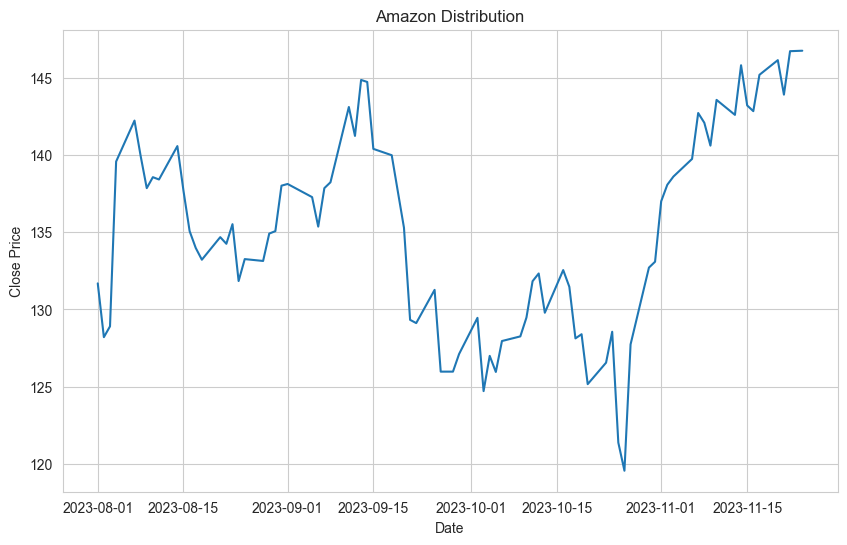

In [10]:
#plotting the distribution of the stock price
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(amazon_distribution['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Distribution')


### Varianza amazon

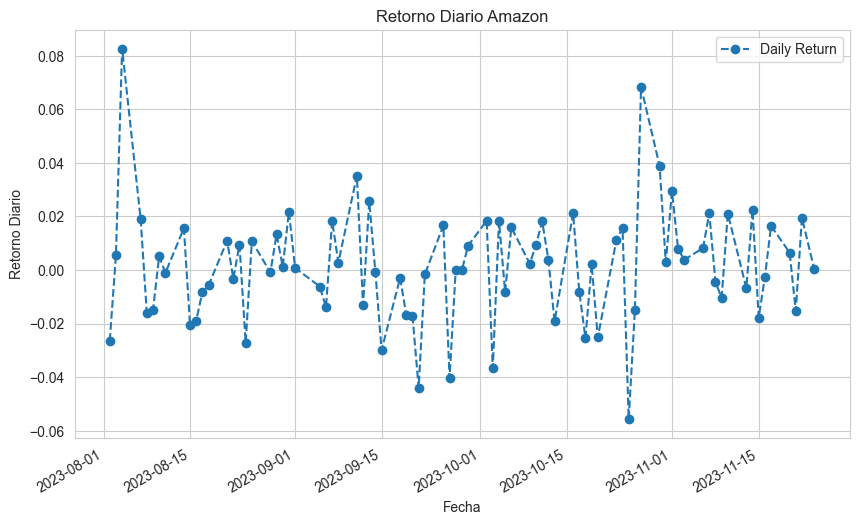

In [11]:
amazon_distribution['Daily Return'] = amazon_distribution['Close'].pct_change()
amazon_distribution['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Amazon")
plt.show()


### Distribución retorno diario.

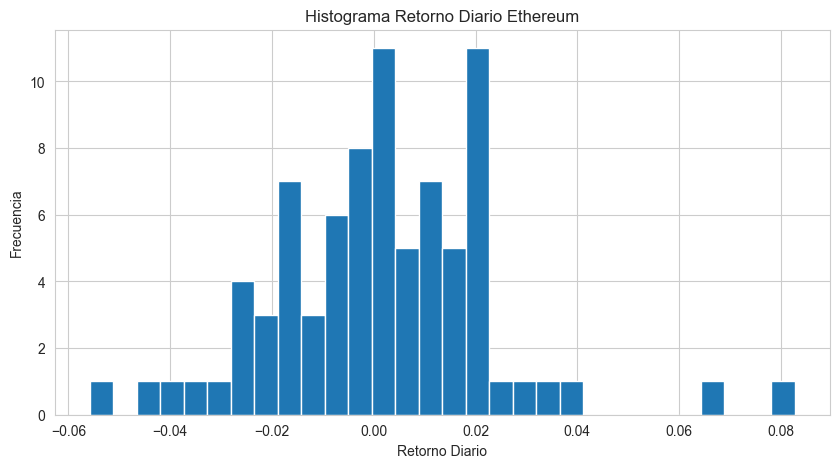

In [12]:
amazon_distribution['Daily Return'].hist(bins=30, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Ethereum")
plt.show()
daily_return_amazon = amazon_distribution['Daily Return'].dropna() 

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 45.7271] [loc=0.002 scale=0.022]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 814.872] [loc=-0.056 scale=0.057]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 814.872] [loc=-4194304.056 scale=4194304.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 24.9084] [loc=0.002 scale=0.016]
[distfit] >INFO> [t         ] [0.09 sec] [RSS: 15.0839] [loc=0.001 scale=0.016]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 78.6207] [loc=-0.007 scale=0.021]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 50.5469] [loc=-0.180 scale=0.003]
[distfit] >INFO> [lognorm   ] [0.06 sec] [RSS: 50.7971] [loc=-0.244 scale=0.244]
[distfit] >INFO> [beta      ] [0.09 sec] [RSS: 52.9819] [loc=-0.159 scale=9699.609]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 645.006] [loc=-0.056 scale=0.138]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 48.7601] [loc=-5.893 scale=0.814]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=4.65916, loc=0.00133728, scale=0.0164868)'}, xlabel='Values', ylabel='Frequency'>)

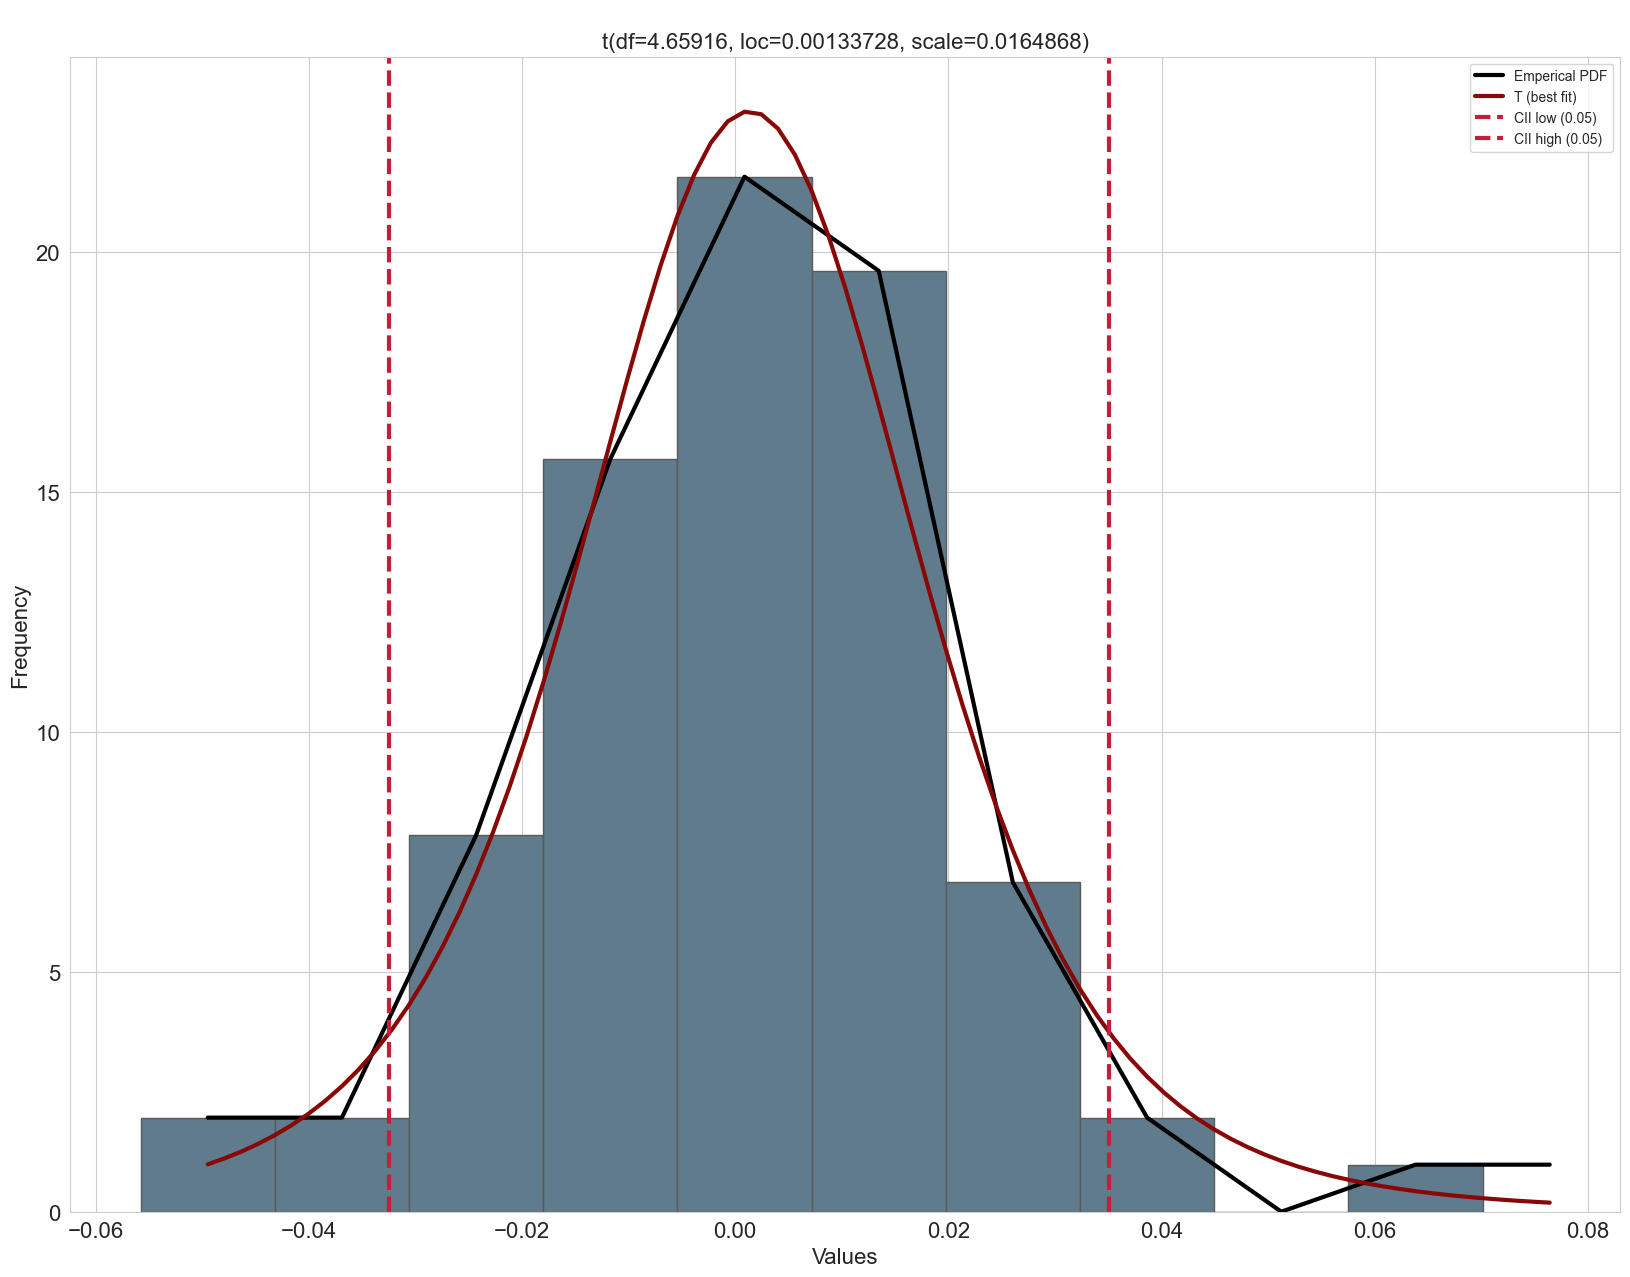

In [13]:
from distfit import distfit
dfit = distfit(todf=True)
dfit.fit_transform(daily_return_amazon)
dfit.plot()

Nuestros datos siguien una distribución t con los siguientes paramemtros. [loc=0.001 scale=0.016]

## Distribución Apple

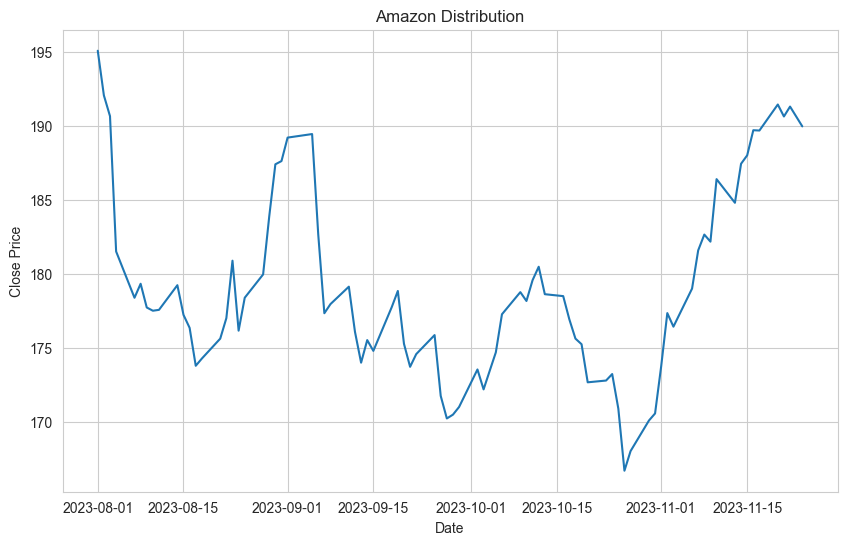

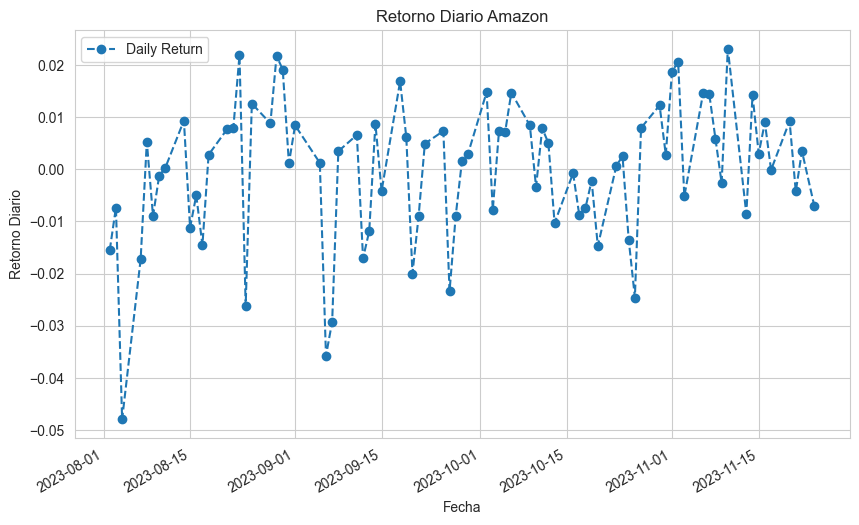

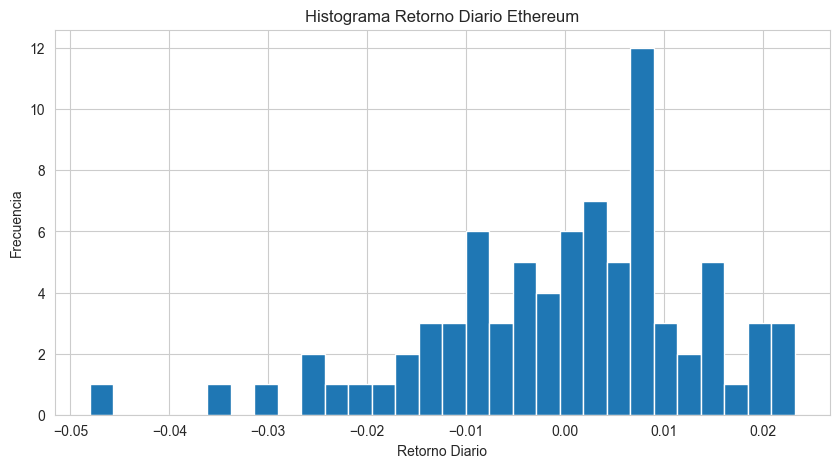

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 265.383] [loc=-0.000 scale=0.013]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2577.22] [loc=-0.048 scale=0.048]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2577.22] [loc=-2097152.048 scale=2097152.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 189.322] [loc=-0.000 scale=0.011]
[distfit] >INFO> [t         ] [0.10 sec] [RSS: 195.212] [loc=0.001 scale=0.012]
[distfit] >INFO> [genextreme] [0.02 sec] [RSS: 227.711] [loc=-0.003 scale=0.015]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 3052.6] [loc=-0.048 scale=1.941]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 265.749] [loc=-6.391 scale=6.391]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 178.735] [loc=-25.463 scale=25.496]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1480.27] [loc=-0.048 scale=0.071]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 155.451] [loc=-0.001 scale=0.014]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nloggamma(c=1.5362, loc=-0.00122891, scale=0.014218)'}, xlabel='Values', ylabel='Frequency'>)

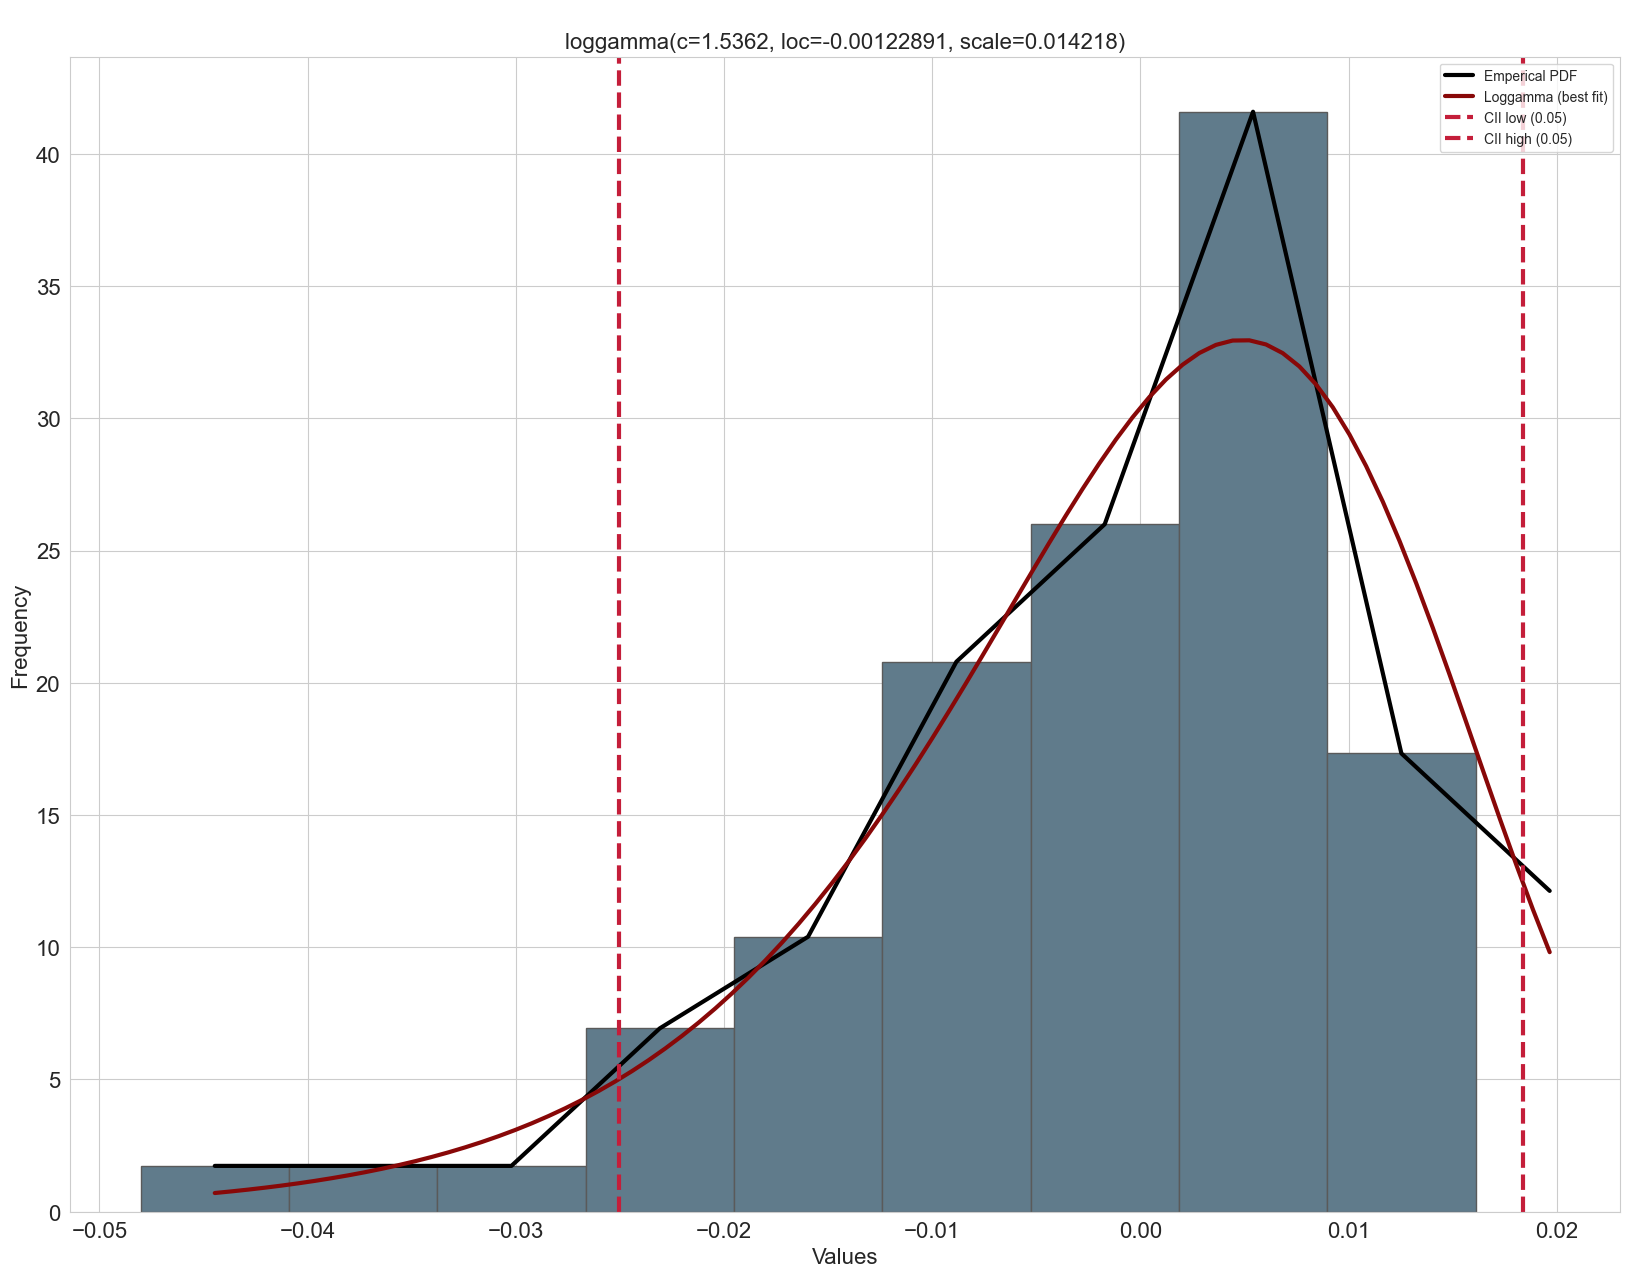

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(apple_distribution['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Distribution')
plt.show()


apple_distribution['Daily Return'] = apple_distribution['Close'].pct_change()
apple_distribution['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Amazon")
plt.show()
apple_distribution['Daily Return'].hist(bins=30, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Ethereum")
plt.show()
daily_return_apple = apple_distribution['Daily Return'].dropna() 

from distfit import distfit
dfit_apple = distfit(todf=True)
dfit_apple.fit_transform(daily_return_apple)
dfit_apple.plot()

Nos da para este caso una \nloggamma(c=1.5362, loc=-0.00122891, scale=0.014218)

### Distribución Meta

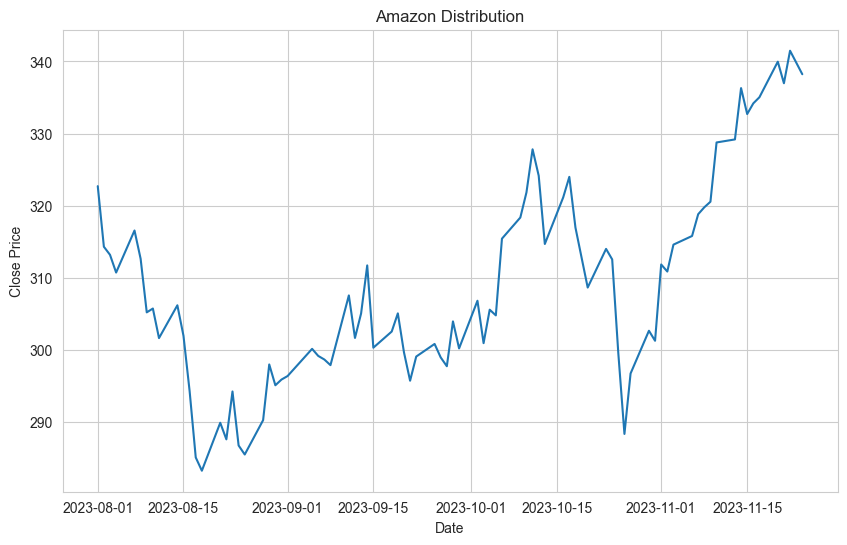

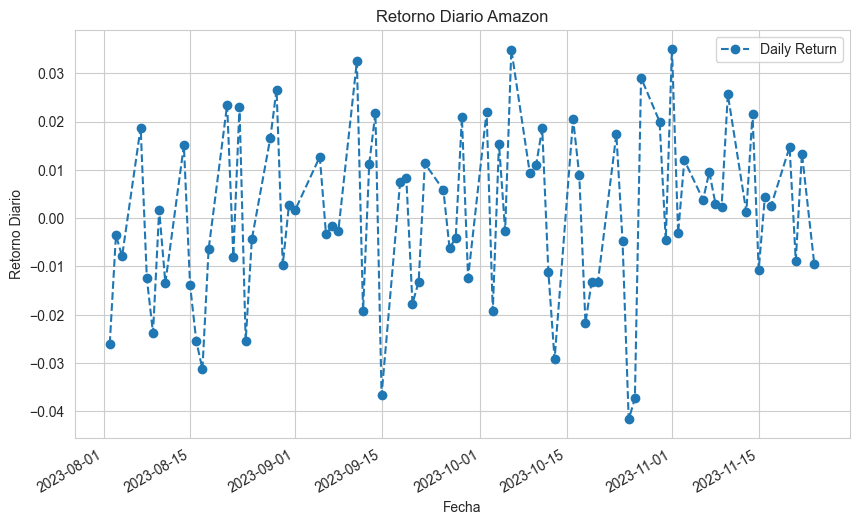

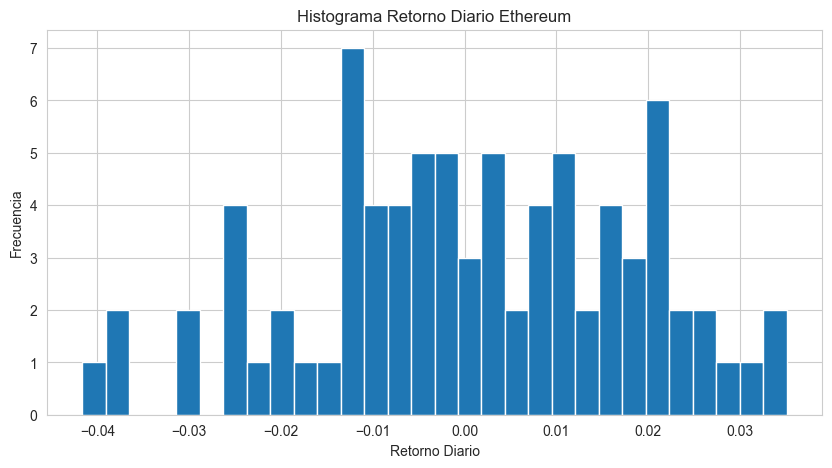

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 36.2818] [loc=0.001 scale=0.018]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 833.819] [loc=-0.042 scale=0.042]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 833.819] [loc=-4194304.042 scale=4194304.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 69.0509] [loc=-0.000 scale=0.016]
[distfit] >INFO> [t         ] [0.16 sec] [RSS: 36.2815] [loc=0.001 scale=0.018]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 750.155] [loc=0.002 scale=0.038]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 38.1345] [loc=-0.359 scale=0.001]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 37.6565] [loc=-3.064 scale=3.065]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 14.7619] [loc=-0.050 scale=0.089]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 269.538] [loc=-0.042 scale=0.077]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 37.441] [loc=-0.145 scale=0.060]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=2.90654, b=2.18872, loc=-0.0498873, scale=0.0887638)'}, xlabel='Values', ylabel='Frequency'>)

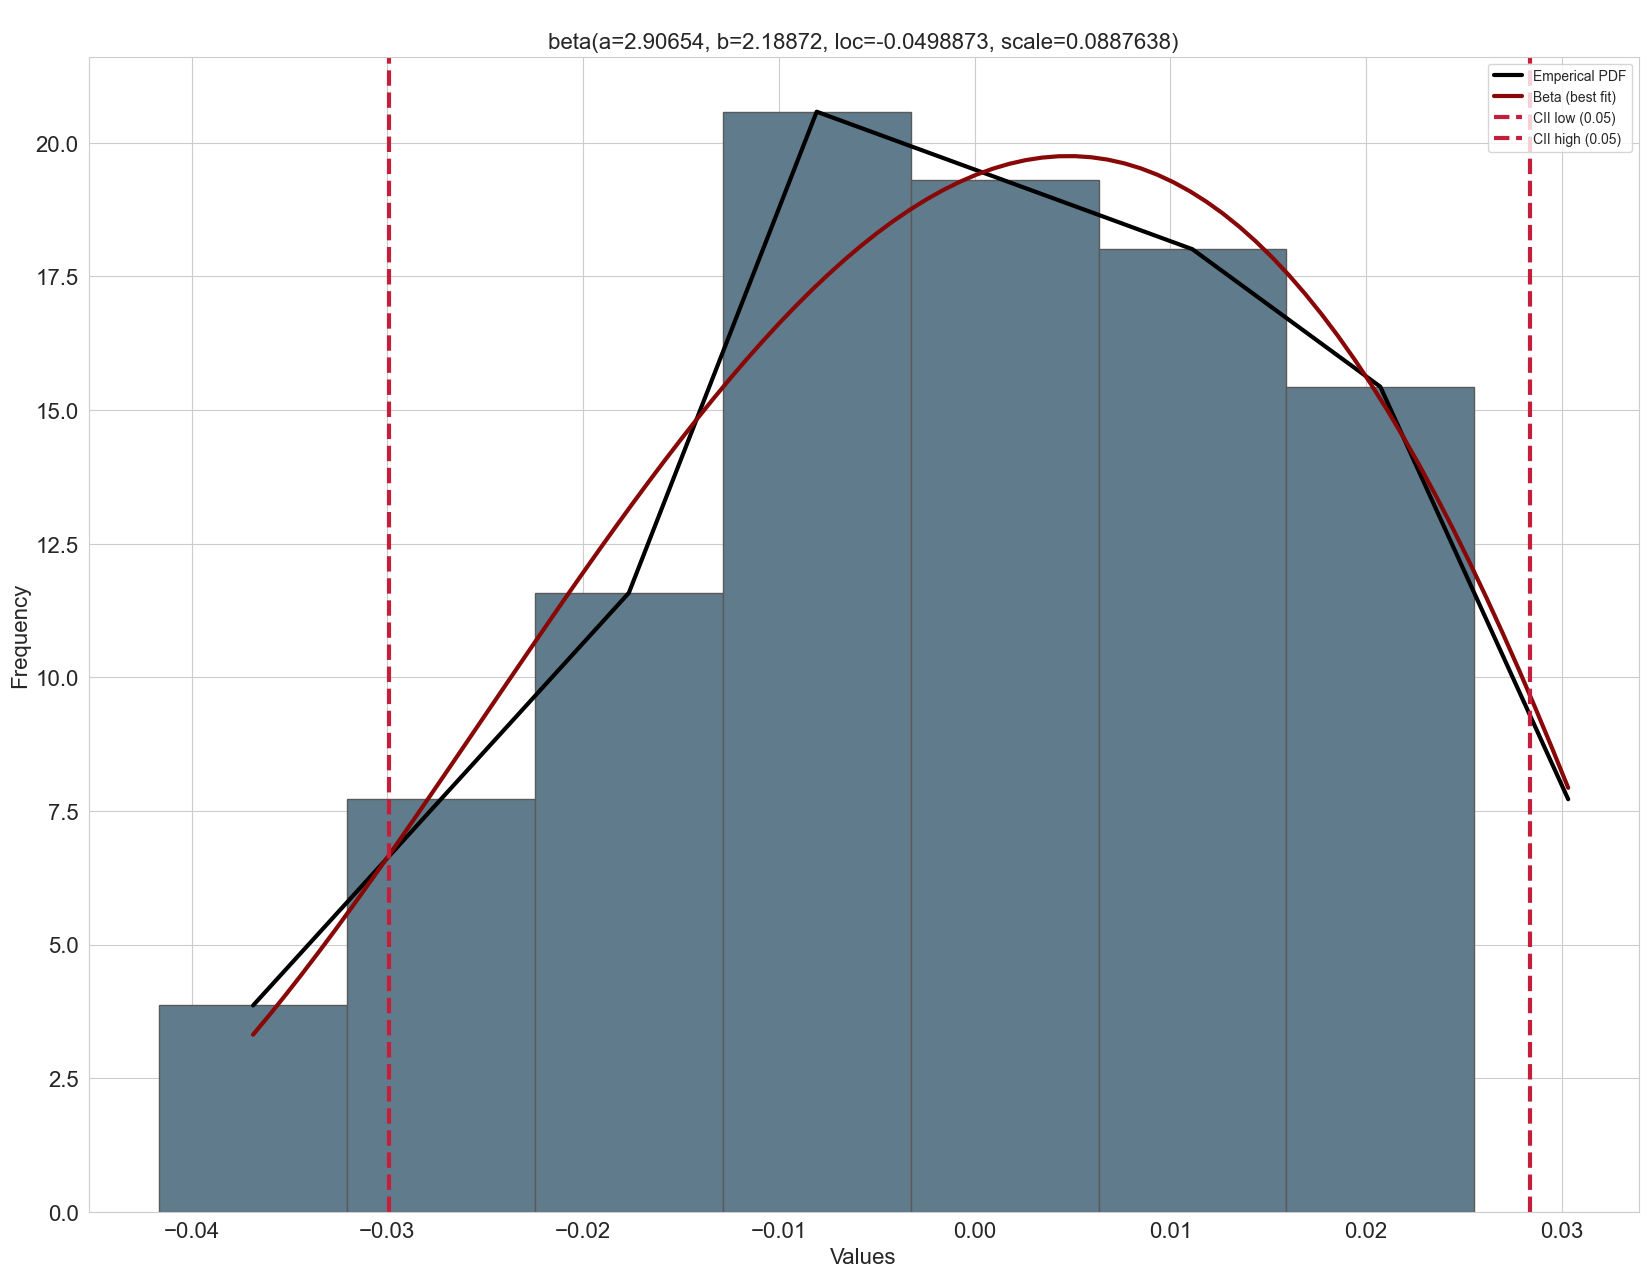

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(meta_distribution['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Distribution')
plt.show()


meta_distribution['Daily Return'] = meta_distribution['Close'].pct_change()
meta_distribution['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Amazon")
plt.show()
meta_distribution['Daily Return'].hist(bins=30, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Ethereum")
plt.show()
daily_return_meta = meta_distribution['Daily Return'].dropna() 

from distfit import distfit
dfit_meta = distfit(todf=True)
dfit_meta.fit_transform(daily_return_meta)
dfit_meta.plot()

Tenemos una beta con los siguientes parametros beta(a=2.90654, b=2.18872, loc=-0.0498873, scale=0.0887638)

## Distribución Tesla


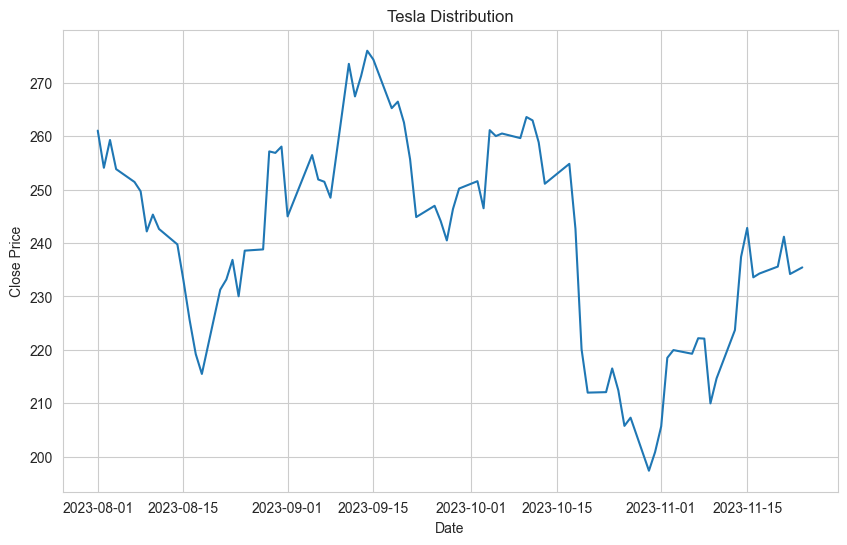

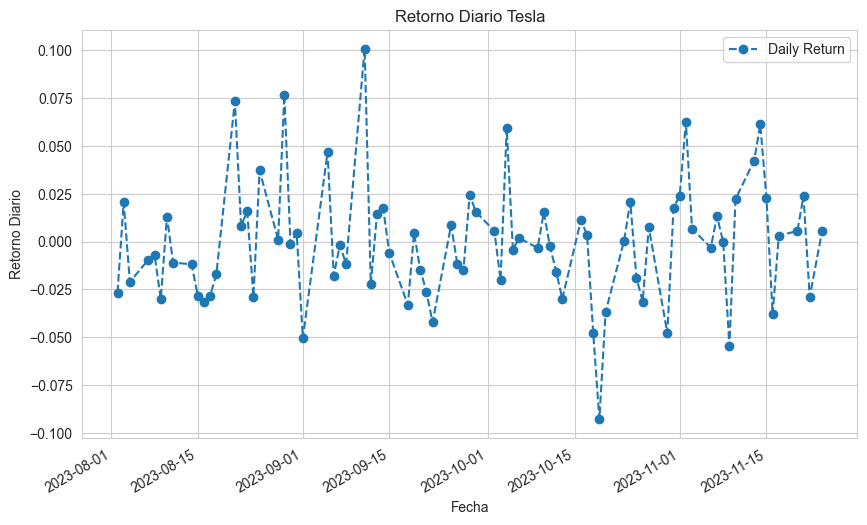

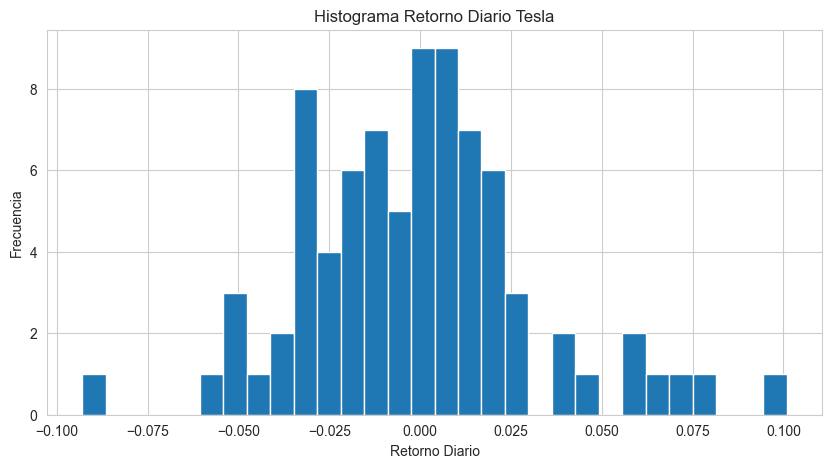

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 29.6794] [loc=-0.001 scale=0.032]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 413.388] [loc=-0.093 scale=0.092]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 413.388] [loc=-16777216.093 scale=16777216.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 22.9811] [loc=-0.001 scale=0.024]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 20.4474] [loc=-0.003 scale=0.024]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 31.0675] [loc=-0.013 scale=0.030]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 26.8871] [loc=-0.250 scale=0.004]
[distfit] >INFO> [lognorm   ] [0.08 sec] [RSS: 26.6493] [loc=-0.332 scale=0.330]
[distfit] >INFO> [beta      ] [0.09 sec] [RSS: 27.2079] [loc=-0.223 scale=5452.987]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 287.273] [loc=-0.093 scale=0.194]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 30.4912] [loc=-7.957 scale=1.118]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=4.53816, loc=-0.00260457, scale=0.0243303)'}, xlabel='Values', ylabel='Frequency'>)

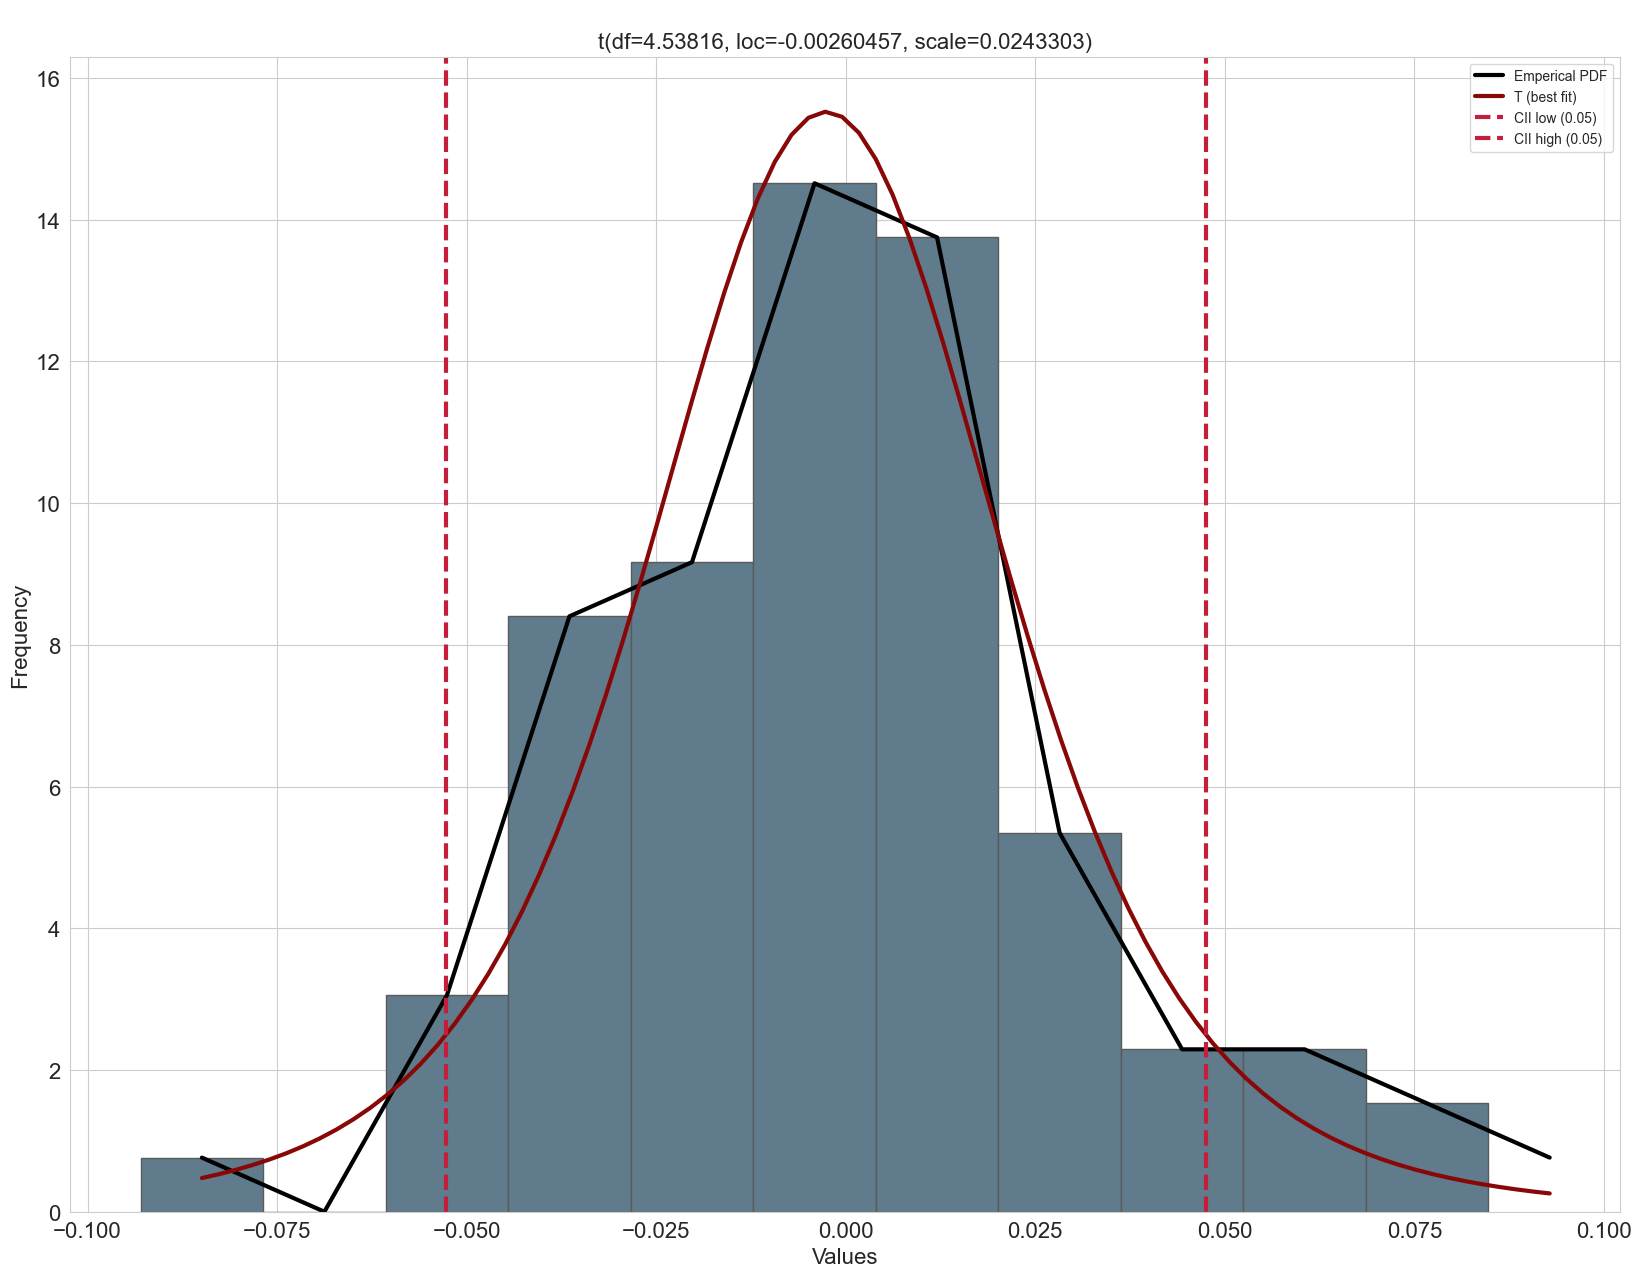

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(tesla_distribution['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Distribution')
plt.show()


tesla_distribution['Daily Return'] = tesla_distribution['Close'].pct_change()
tesla_distribution['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Tesla")
plt.show()
tesla_distribution['Daily Return'].hist(bins=30, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Tesla")
plt.show()
daily_return_tesla = tesla_distribution['Daily Return'].dropna() 

from distfit import distfit
dfit_tesla = distfit(todf=True)
dfit_tesla.fit_transform(daily_return_tesla)
dfit_tesla.plot()

Para este caso tenemos una t  con los siguientes paramtros[0.08 sec] [RSS: 20.4474] [loc=-0.003 scale=0.024]

## Distribución Coca Cola

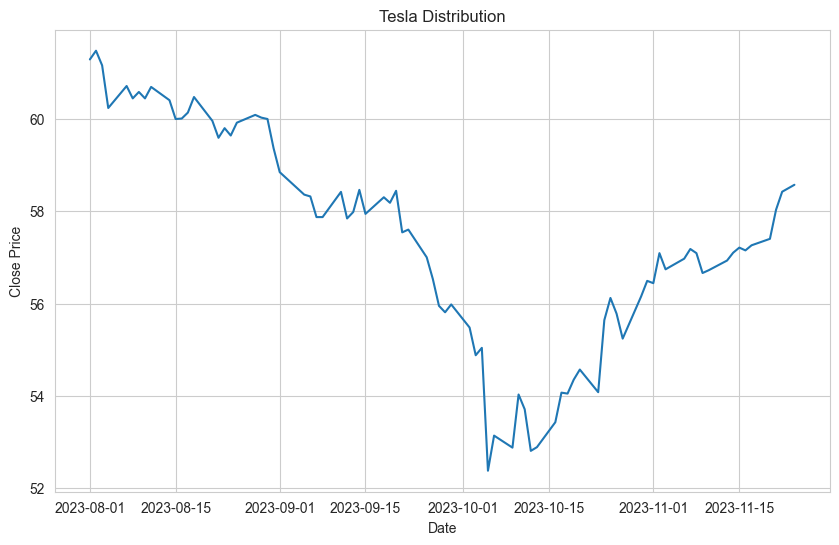

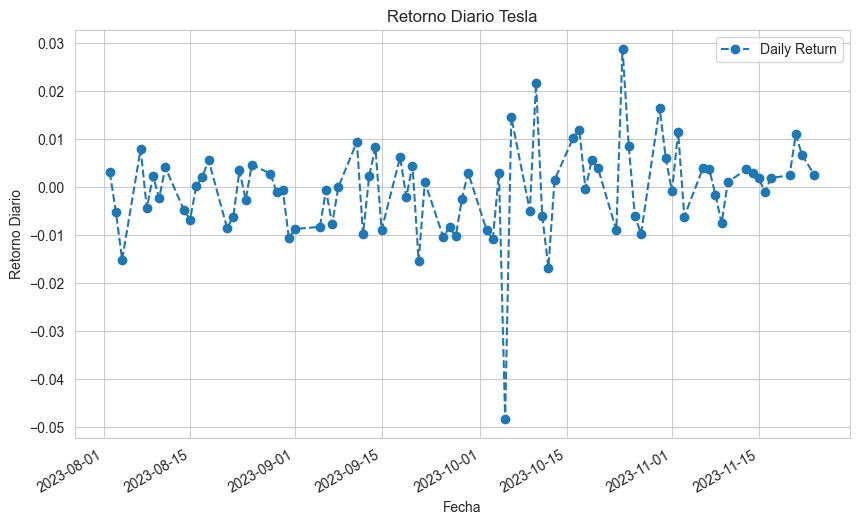

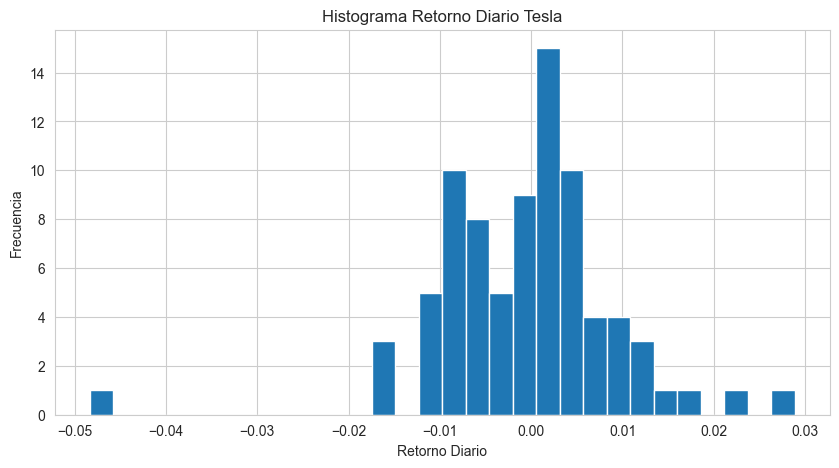

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1248] [loc=-0.001 scale=0.010]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 7369.01] [loc=-0.048 scale=0.048]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 7369.01] [loc=-4194304.048 scale=4194304.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 1213.12] [loc=-0.000 scale=0.007]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 1187.82] [loc=-0.000 scale=0.007]
[distfit] >INFO> [genextreme] [0.16 sec] [RSS: 7222.76] [loc=-0.002 scale=0.036]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 8122.26] [loc=-0.048 scale=1.939]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 1255.87] [loc=-4.759 scale=4.759]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 4201.25] [loc=-0.052 scale=0.081]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5761.68] [loc=-0.048 scale=0.077]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 1164.59] [loc=-0.073 scale=0.031]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nloggamma(c=10.9638, loc=-0.0730003, scale=0.0308686)'}, xlabel='Values', ylabel='Frequency'>)

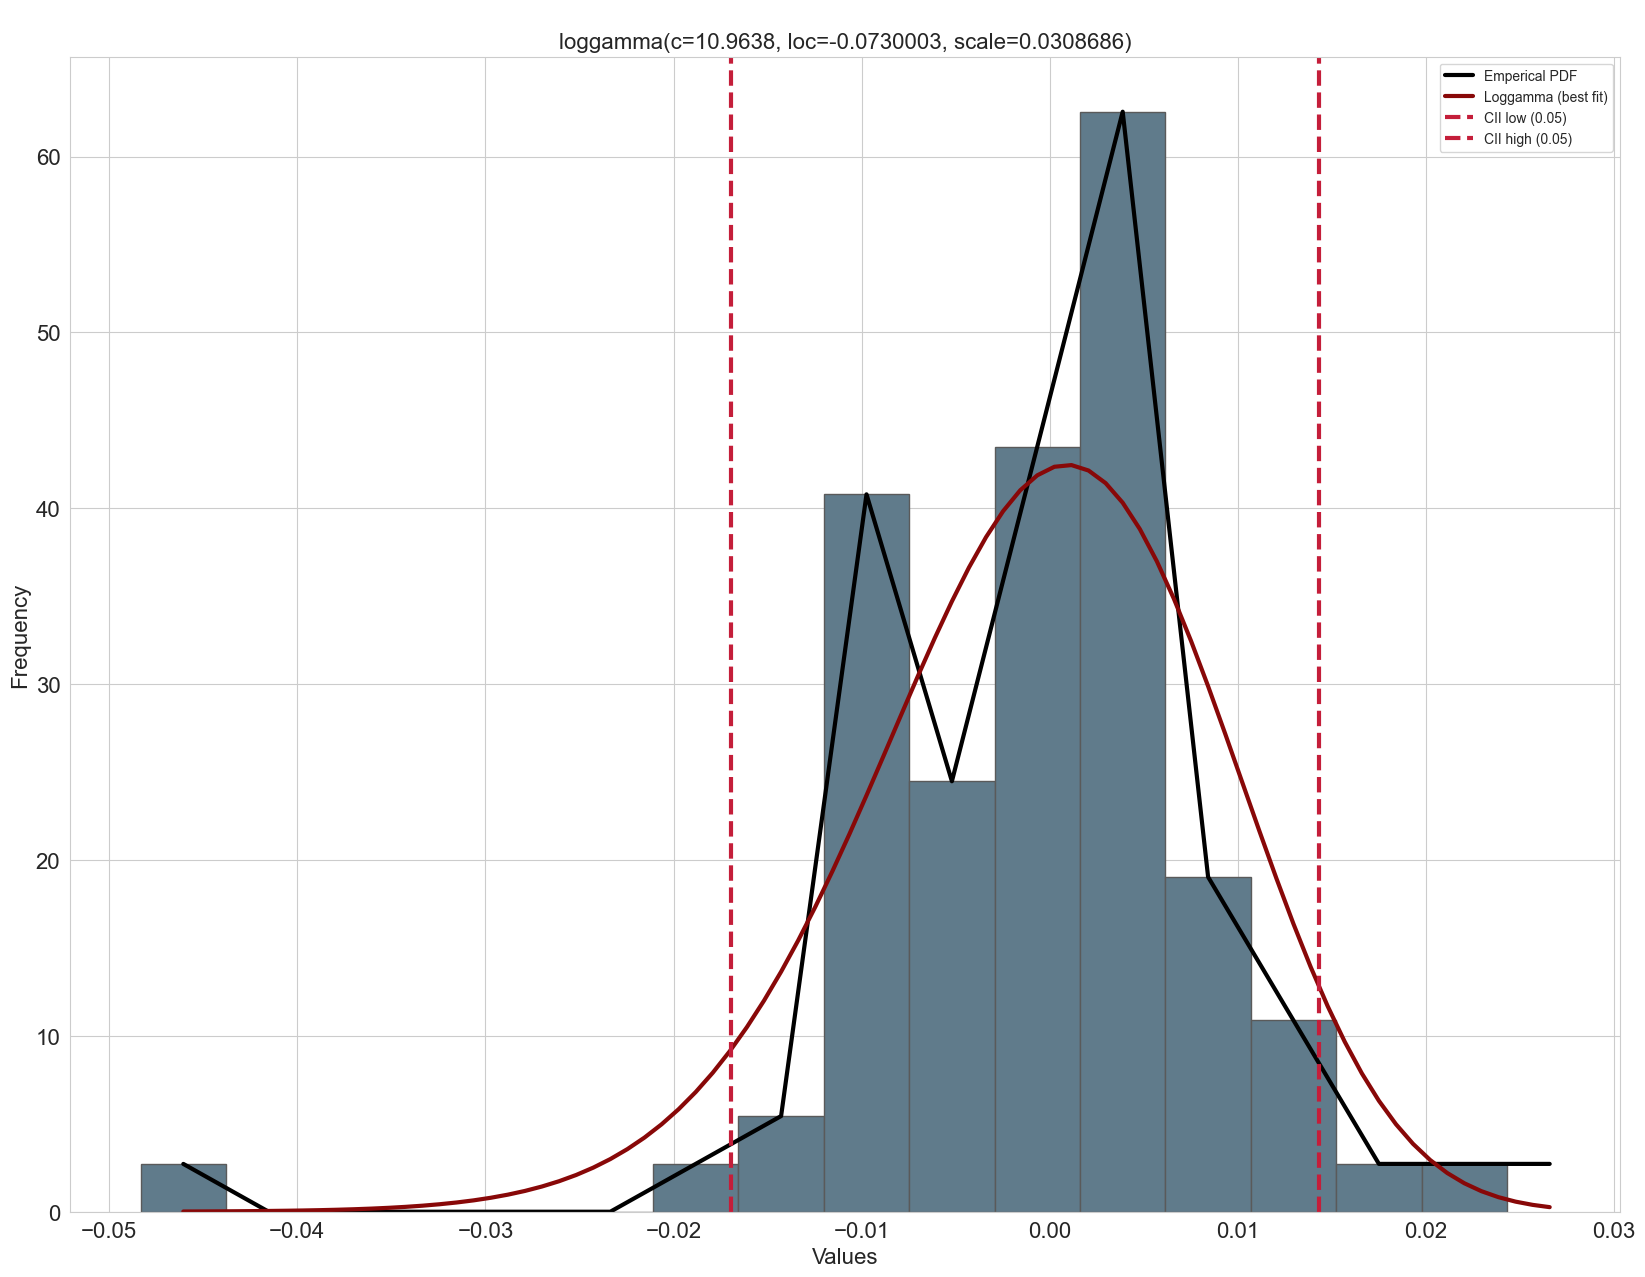

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(coca_cola_distribution['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Distribution')
plt.show()


coca_cola_distribution['Daily Return'] = coca_cola_distribution['Close'].pct_change()
coca_cola_distribution['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Tesla")
plt.show()
coca_cola_distribution['Daily Return'].hist(bins=30, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Tesla")
plt.show()
daily_return_cocacola = coca_cola_distribution['Daily Return'].dropna() 

from distfit import distfit
dfit_cocacola = distfit(todf=True)
dfit_cocacola.fit_transform(daily_return_cocacola)
dfit_cocacola.plot()

En este caso tenemos una variable nlogamma con los siguientes parametros [loggamma  ] [0.03 sec] [RSS: 1164.59] [loc=-0.073 scale=0.031]

## Solución Cerrada de la ecuación de Helsen 

Cuando decimos que el modelo de Heston permite soluciones analíticas para opciones europeas de compra y venta, significa que existen fórmulas matemáticas que proporcionan soluciones directas para los precios de estas opciones sin necesidad de métodos de aproximación numérica como diferencias finitas o simulaciones de Monte Carlo.

Las soluciones analíticas para opciones europeas de compra y venta en el modelo de Heston fueron derivadas por el propio Steven Heston. Para la opción europea de compra, la fórmula se presenta de la siguiente manera:

$C(S, K, T) = S_0 P_1 - K e^{-rT} P_2,$ 

donde:

- \(S_0\) es el precio actual de la acción.
- \(K\) es el precio de ejercicio de la opción.
- \(T\) es el tiempo hasta el vencimiento.
- \(r\) es la tasa de interés libre de riesgo.
- \(P_1\) y \(P_2\) son probabilidades relacionadas con los parámetros del modelo de Heston(soluciones analíticas).

De manera similar, la solución analítica para la opción europea de venta es:

$ P(S, K, T) = K e^{-rT} P_4 - S_0 P_3,$ 

En nuestros datos nosotros tenemos el precio actual de la acción, el tiempo hasta el vencimiento, la tasa de interes libre de inversión vamos a ponerles un valor de 0.05
y el k lo tenemos en el precio strike. Luego podemos calcular los parametros de la ecuación antes vista.

Para esto vamos a utilizar un paquete que ya está tiene estas libreries implementadas y vamos a utilizar un modelo de compra Plain Vanilla, ya que asi tenemos nuestros datos Vamos a emplear el paquete QuantLib para calcular los parámetros dados los datos S_0, K, T, r y

Pago de una Opción de Compra Plain Vanilla:
El titular de una opción de compra plain vanilla posee el derecho (sin la obligación) de adquirir un activo subyacente a un precio específico (precio de ejercicio) antes o en la fecha de vencimiento de la opción. El pago al vencimiento de la opción de compra se determina como la diferencia entre el precio del activo subyacente en el vencimiento y el precio de ejercicio, únicamente si esta diferencia es positiva. Si el precio del activo subyacente se encuentra por debajo del precio de ejercicio, la opción expira sin valor y el pago es nulo.

Pago de una Opción de Venta Plain Vanilla:
El poseedor de una opción de venta plain vanilla tiene el derecho (sin la obligación) de vender un activo subyacente a un precio especificado (precio de ejercicio) antes o en la fecha de vencimiento de la opción. El pago al vencimiento de la opción de venta se calcula como la diferencia entre el precio de ejercicio y el precio del activo subyacente en el vencimiento, solo si esta diferencia es positiva. Si el precio del activo subyacente está por encima del precio de ejercicio, la opción expira sin valor y el pago es cero.

### Calculo de parametros para cada ecuación


In [18]:

def heston_model(params, maturities, strikes, market_prices, option_types,S0):
    # Extraer parámetros del modelo de Heston
    v0, kappa, theta, sigma, rho = params

    # Configurar el proceso de Heston
    today = ql.Date().todaysDate()  # Obtener la fecha actual
    riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.05, ql.Actual365Fixed()))  # Tasa de interés libre de riesgo
    dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual365Fixed()))  # Tasa de dividendos
    initialValue = ql.QuoteHandle(ql.SimpleQuote(S0))  # Valor inicial del subyacente
    
    # Crear el proceso de Heston
    hestonProcess = ql.HestonProcess(riskFreeTS, dividendTS, initialValue, v0, kappa, theta, sigma, rho)

    # Calcular precios del modelo
    model_prices = []
    for maturity, strike, market_price, option_type in zip(maturities, strikes, market_prices, option_types):
        if option_type == 'Call':
            payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike)  # Tipo de opción Call
        elif option_type == 'Put':
            payoff = ql.PlainVanillaPayoff(ql.Option.Put, strike)  # Tipo de opción Put
        else:
            raise ValueError("Tipo de opción no válido")  # Error si el tipo de opción no es Call ni Put

        # Crear la opción europea con el payoff correspondiente y la fecha de ejercicio
        option = ql.EuropeanOption(payoff, ql.EuropeanExercise(today + ql.Period(int(maturity), ql.Days)))

        # Configurar el motor de precios utilizando el modelo de Heston
        engine = ql.AnalyticHestonEngine(ql.HestonModel(hestonProcess))
        option.setPricingEngine(engine)

        # Calcular el precio del modelo y agregarlo a la lista
        model_prices.append(option.NPV())

    # Calcular el Error Cuadrático Medio (MSE)
    mse = np.mean((np.array(model_prices) - market_prices)**2)

    return mse  # Devolver el MSE como resultado de la función





### Parametros Apple

In [19]:


#LLamamos a la función de apple para ver los valores.
strikes_apple=Apple_actions['Strike'].values
maturities_days_apple=Apple_actions['Maturity_days'].values
option_types_apple=Apple_actions['Option_type'].values
mid_prices_apple=Apple_actions['Mid'].values
S_0_apple=87 #Precio de apple el 19 de junio del 2020 


initial_params = [0.1, 1, 0.2, 0.2, 0.3]
bounds = [(0.1, 0.5), (0.1, 5.0), (0.1, 1.0), (0.1, 1.0), (-0.9, 0.9)]

# Minimize the MSE with bounds on the parameters
result = minimize(heston_model, initial_params, args=(maturities_days_apple, strikes_apple, mid_prices_apple, option_types_apple,S_0_apple), method='L-BFGS-B', bounds=bounds)

# Extract the calibrated parameters
apple_params = result.x

# Print the calibrated parameters
print("Calibrated Parameters:")
print("Initial Volatility (v0):", apple_params[0])
print("Rate of Mean Reversion (kappa):", apple_params[1])
print("Long-Term Mean of Variance (theta):", apple_params[2])
print("Volatility of Volatility (sigma):", apple_params[3])
print("Correlation between Returns and Variances (rho):", apple_params[4])

Calibrated Parameters:
Initial Volatility (v0): 0.1
Rate of Mean Reversion (kappa): 2.2798492404316497
Long-Term Mean of Variance (theta): 0.1
Volatility of Volatility (sigma): 1.0
Correlation between Returns and Variances (rho): -0.9


## Parametros Amazon

In [20]:

#LLamamos a la función de apple para ver los valores.

strikes_amazon=Amazon_actions['strike'].values
maturities_days_amazon=Amazon_actions['Maturity_days'].values
option_types_amazon=Amazon_actions['OptionType'].values
mid_prices_amazon=Amazon_actions['Mid'].values
S_0_amazon=146	#precio al 25 de noviembre del 2022


initial_params = [0.5, 1, 0.2, 0.2, 0.3]
bounds = [(0.1, 0.5), (0.1, 5.0), (0.1, 1.0), (0.1, 1.0), (-0.9, 0.9)]

# Minimize the MSE with bounds on the parameters
result = minimize(heston_model, initial_params, args=(maturities_days_amazon, strikes_amazon, mid_prices_amazon, option_types_amazon,S_0_amazon), method='L-BFGS-B', bounds=bounds)

# Extract the calibrated parameters
amazon_param = result.x

# Print the calibrated parameters
print("Calibrated Parameters:")
print("Initial Volatility (v0):", amazon_param[0])
print("Rate of Mean Reversion (kappa):", amazon_param[1])
print("Long-Term Mean of Variance (theta):", amazon_param[2])
print("Volatility of Volatility (sigma):", amazon_param[3])
print("Correlation between Returns and Variances (rho):", amazon_param[4])

Calibrated Parameters:
Initial Volatility (v0): 0.16174547566402067
Rate of Mean Reversion (kappa): 0.998638582181133
Long-Term Mean of Variance (theta): 0.1995390057538557
Volatility of Volatility (sigma): 1.0
Correlation between Returns and Variances (rho): -0.9


## Tesla parametros 

In [21]:
#LLamamos a la función de apple para ver los valores.

strikes_tesla=tesla_actions['strike'].values
maturities_days_tesla=tesla_actions['Maturity_days'].values
option_types_tesla=tesla_actions['OptionType'].values
mid_prices_tesla=tesla_actions['Mid'].values
S_0_tesla=236


initial_params = [0.1, 0.2, 0.2, 0.2, 0.3]
bounds = [(0.1, 0.5), (0.1, 5.0), (0.1, 1.0), (0.1, 1.0), (-0.9, 0.9)]

# Minimize the MSE with bounds on the parameters
result = minimize(heston_model, initial_params, args=(maturities_days_tesla, strikes_tesla, mid_prices_tesla, option_types_tesla,S_0_tesla), method='Nelder-Mead', bounds=bounds)

# Extract the calibrated parameters
tesla_param = result.x

# Print the calibrated parameters
print("Calibrated Parameters:")
print("Initial Volatility (v0):", tesla_param[0])
print("Rate of Mean Reversion (kappa):", tesla_param[1])
print("Long-Term Mean of Variance (theta):", tesla_param[2])
print("Volatility of Volatility (sigma):", tesla_param[3])
print("Correlation between Returns and Variances (rho):", tesla_param[4])

Calibrated Parameters:
Initial Volatility (v0): 0.5
Rate of Mean Reversion (kappa): 0.10000000000000026
Long-Term Mean of Variance (theta): 1.0
Volatility of Volatility (sigma): 1.0
Correlation between Returns and Variances (rho): -0.9


## Parametros CoCa Cola

In [22]:
strikes_co=coca_cola_actions['strike'].values
maturities_days_co=coca_cola_actions['Maturity_days'].values
option_types_co=coca_cola_actions['OptionType'].values
mid_prices_co=coca_cola_actions['Mid'].values
S_0_co=58


initial_params = [0.1, 2, 0.2, 0.2, 0.3]
bounds = [(0.1, 0.5), (0.1, 5.0), (0.1, 1.0), (0.1, 1.0), (-0.9, 0.9)]

# Minimize the MSE with bounds on the parameters
result = minimize(heston_model, initial_params, args=(maturities_days_co, strikes_co, mid_prices_co, option_types_co,S_0_co), method='Nelder-Mead', bounds=bounds)

# Extract the calibrated parameters
co_param = result.x

# Print the calibrated parameters
print("Calibrated Parameters:")
print("Initial Volatility (v0):", co_param[0])
print("Rate of Mean Reversion (kappa):", co_param[1])
print("Long-Term Mean of Variance (theta):", co_param[2])
print("Volatility of Volatility (sigma):", co_param[3])
print("Correlation between Returns and Variances (rho):", co_param[4])

Calibrated Parameters:
Initial Volatility (v0): 0.107369240141303
Rate of Mean Reversion (kappa): 5.0
Long-Term Mean of Variance (theta): 0.10000000000000016
Volatility of Volatility (sigma): 1.0
Correlation between Returns and Variances (rho): -0.8999951876399512


## Parametros Meta

In [23]:
strikes_meta=Meta_actions['strike'].values
maturities_days_meta=Meta_actions['Maturity_days'].values
option_types_meta=Meta_actions['OptionType'].values
mid_prices_meta=Meta_actions['Mid'].values
S_0_meta=337


initial_params = [0.1, 2, 0.2, 0.2, 0.3]
bounds = [(0.1, 0.5), (0.1, 5.0), (0.1, 1.0), (0.1, 1.0), (-0.9, 0.9)]

# Minimize the MSE with bounds on the parameters
result = minimize(heston_model, initial_params, args=(maturities_days_meta, strikes_meta, mid_prices_meta, option_types_meta,S_0_meta), method='Nelder-Mead', bounds=bounds)

# Extract the calibrated parameters
meta_param = result.x

# Print the calibrated parameters
print("Calibrated Parameters:")
print("Initial Volatility (v0):", meta_param[0])
print("Rate of Mean Reversion (kappa):", meta_param[1])
print("Long-Term Mean of Variance (theta):", meta_param[2])
print("Volatility of Volatility (sigma):", meta_param[3])
print("Correlation between Returns and Variances (rho):", meta_param[4])

Calibrated Parameters:
Initial Volatility (v0): 0.17523115904575684
Rate of Mean Reversion (kappa): 0.1
Long-Term Mean of Variance (theta): 1.0
Volatility of Volatility (sigma): 1.0
Correlation between Returns and Variances (rho): 0.9


# Simulación

La dinámica del precio del activo en el modelo de Heston se describe mediante la ecuación: Discreta

$S[i] = S[i-1] \cdot \exp\left((r - \frac{1}{2}v[i-1]) \cdot \Delta t + \sqrt{v[i-1] \cdot \Delta t} \cdot Z_{\text{corr}}[0, i-1, :]\right)$

De manera similar, la dinámica de la volatilidad se modela con la ecuación:

$v[i] = \max\left(v[i-1] + \kappa(\theta - v[i-1]) \cdot \Delta t + \sigma \cdot \sqrt{v[i-1] \cdot \Delta t} \cdot Z_{\text{corr}}[1, i-1, :], 0\right)$


In [24]:
def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    """
    Entradas:
     - S0, v0: parámetros iniciales para el activo y la varianza
     - rho   : correlación entre los rendimientos del activo y la varianza
     - kappa : tasa de reversión media en el proceso de varianza
     - theta : media a largo plazo del proceso de varianza
     - sigma : volatilidad de la volatilidad / volatilidad del proceso de varianza
     - T     : tiempo de simulación
     - N     : número de pasos de tiempo
     - M     : número de escenarios / simulaciones
    
    Salidas:
    - precios del activo a lo largo del tiempo (array de numpy)
    - varianza a lo largo del tiempo (array de numpy)
    """
    # inicializar otros parámetros
    dt = T/N
    mu = np.array([0, 0])
    cov = np.array([[1, rho],
                    [rho, 1]])

    # arrays para almacenar precios y varianzas
    S = np.full(shape=(N+1, M), fill_value=S0)
    v = np.full(shape=(N+1, M), fill_value=v0)

    # muestreo de variables aleatorias independientes distribuidas normalmente
    Z_independent = np.random.normal(size=(2, N, M))

    # Introducir correlación utilizando la descomposición de Cholesky
    Z_corr = np.zeros_like(Z_independent)
    for i in range(M):
        L = np.linalg.cholesky(cov)
        Z_corr[:, :, i] = np.dot(L, Z_independent[:, :, i])

    for i in range(1, N+1):
        # Dinámica del Precio del Activo (Movimiento Browniano Geométrico)
        S[i] = S[i-1] * np.exp((r - 0.5*v[i-1]) * dt + np.sqrt(v[i-1] * dt) * Z_corr[0, i-1, :])
        
        # Dinámica de la Volatilidad (Difusión de Raíz Cuadrada)
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt) * Z_corr[1, i-1, :], 0)
    
    return S, v





## Simulación Apple

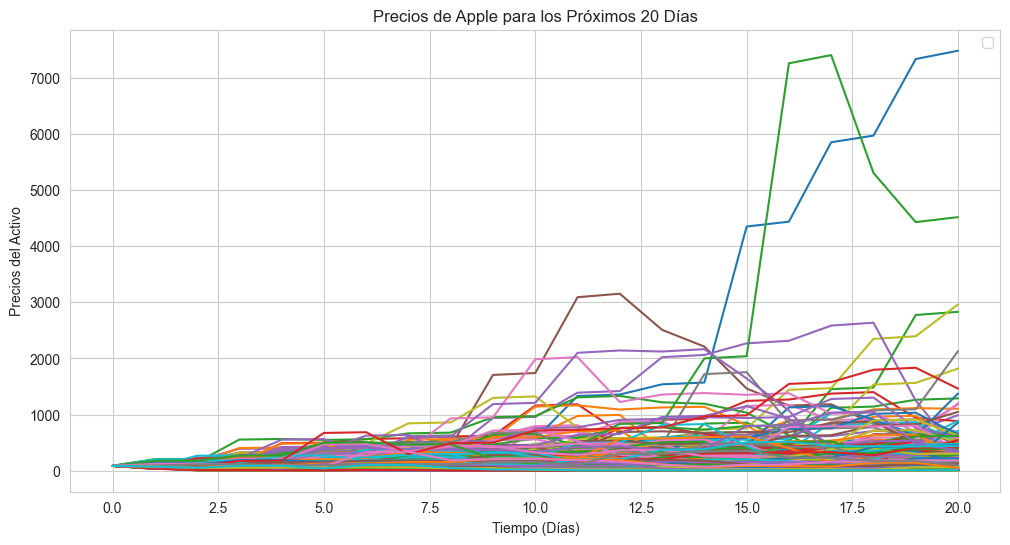

       Mean     Std Dev
0    87.000    0.000000
1    88.451   28.662609
2    89.118   41.310297
3    90.427   58.613089
4    92.485   71.072182
5    93.423   83.499067
6    93.112   90.241082
7    94.120  100.357198
8    94.463  111.122035
9    95.770  136.820280
10   99.309  160.878269
11  102.244  196.518376
12  101.843  194.275540
13   99.026  191.951663
14  103.570  208.733444
15  104.623  238.474907
16  109.428  325.604341
17  110.700  355.150461
18  110.290  331.617246
19  105.324  340.154948
20  107.325  353.402689


In [25]:
# Suponiendo que heston_model_sim está definida

# Parámetros calibrados (reemplazar con tus parámetros calibrados reales)

S0 = S_0_apple  # precio del activo
T_dias = 20     # tiempo total de simulación en días
N = 20          # número de pasos de tiempo en la simulación
M = 1000        # número de simulaciones

v0 = apple_params[0]
kappa = apple_params[1]
theta = apple_params[2]
sigma = apple_params[3]
rho = apple_params[4]
r = 0.02

# Calcular el incremento de tiempo
dt = T_dias / N

# Ejecutar la simulación del modelo de Heston para los próximos 20 días
S_p, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T_dias, N, M)

# Crear un DataFrame para almacenar los resultados de la simulación
time_values = np.linspace(0, T_dias, N+1)
columns = [f'Scenario_{i+1}' for i in range(M)]

simulation_apple = pd.DataFrame(np.column_stack([time_values, S_p[:, :]]), columns=['Tiempo'] + columns)

# Guardar el DataFrame en un archivo CSV si es necesario

# Graficar la distribución de los precios
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(M):
    ax.plot(simulation_apple['Tiempo'], simulation_apple[f'Scenario_{i+1}'])

ax.set_title(f'Precios de Apple para los Próximos {T_dias} Días')
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precios del Activo')
ax.legend()
plt.show()



mean_values = simulation_apple.iloc[:, 1:].mean(axis=1)
std_dev_values = simulation_apple.iloc[:, 1:].std(axis=1)

# Create a new DataFrame with mean and standard deviation
result_apple = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

# Display the results
print(result_apple)





## Simulación Meta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


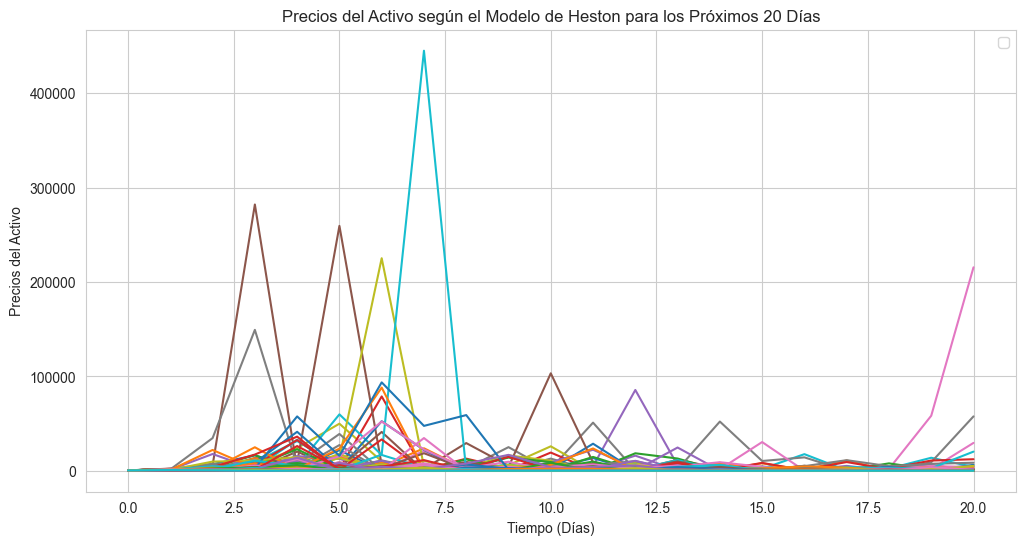

          Mean      Std Dev
0   336.966303     3.369832
1   346.598040   198.508440
2   357.717128   616.421068
3   384.004800  3269.847974
4   325.937106  1284.105314
5   283.508249  2825.293208
6   265.321368  2891.161100
7   232.578942  4524.782924
8   166.574143   756.595525
9   150.550245   530.628653
10  146.705429  1130.364049
11  130.124288   746.293667
12  118.941906   933.149748
13  108.323268   438.691381
14   95.465253   575.876108
15   85.262774   379.359534
16   77.345565   288.375533
17   69.534047   229.556991
18   62.839416   166.449254
19   67.664634   640.468545
20   87.831317  2267.867353


In [84]:
S0 = S_0_meta  # precio del activo
T_dias = 20     # tiempo total de simulación en días
N = 20          # número de pasos de tiempo en la simulación
M = 10000        # número de simulaciones

v0 = meta_param[0]
kappa = meta_param[1]
theta = meta_param[2]
sigma = meta_param[3]
rho = meta_param[4]
r = 0.02

# Calcular el incremento de tiempo
dt = T_dias / N

# Ejecutar la simulación del modelo de Heston para los próximos 20 días
S_p, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T_dias, N, M)

# Crear un DataFrame para almacenar los resultados de la simulación
time_values = np.linspace(0, T_dias, N+1)
columns = [f'Scenario_{i+1}' for i in range(M)]

simulation_meta = pd.DataFrame(np.column_stack([time_values, S_p[:, :]]), columns=['Tiempo'] + columns)

# Guardar el DataFrame en un archivo CSV si es necesario

# Graficar la distribución de los precios
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(M):
    ax.plot(simulation_meta['Tiempo'], simulation_meta[f'Scenario_{i+1}'])

ax.set_title(f'Precios de Meta para los Próximos {T_dias} Días')
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precios del Activo')
ax.legend()
plt.show()



mean_values = simulation_meta.mean(axis=1)
std_dev_values = simulation_meta.std(axis=1)

# Create a new DataFrame with mean and standard deviation
result_meta = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

# Display the results
print(result_meta)


## Simulación Amazon

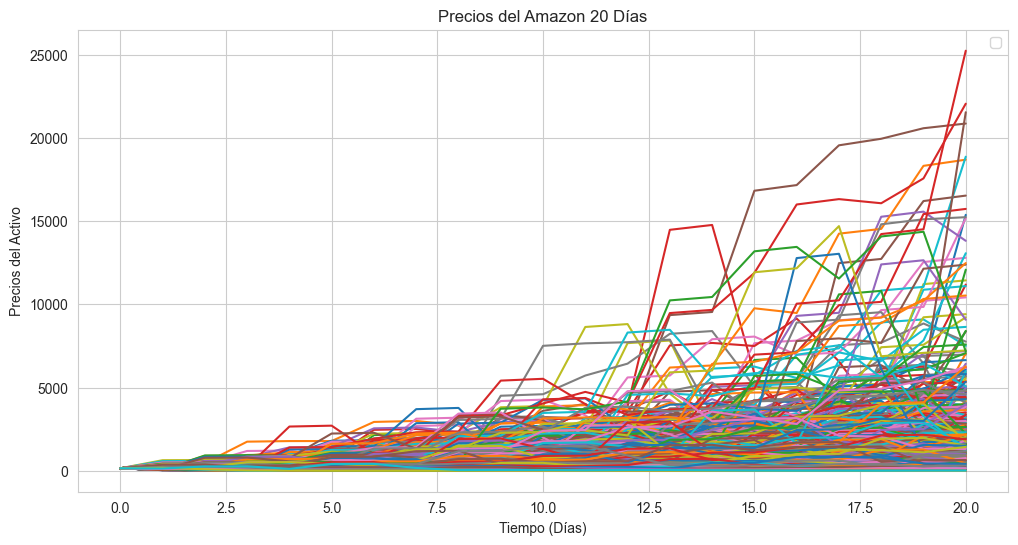

          Mean     Std Dev
0   145.985401    1.459927
1   148.535346   62.897788
2   150.612839   88.910225
3   152.763724  117.626307
4   155.382862  144.567897
5   159.954805  174.554805
6   164.059894  203.746986
7   167.110589  232.681488
8   173.527147  270.869514
9   176.564544  306.281628
10  178.646035  343.614455
11  180.892411  373.554737
12  185.337566  416.883016
13  187.423958  486.265720
14  186.446855  504.286240
15  190.518748  560.140437
16  192.755424  619.982716
17  198.522448  697.614281
18  203.967903  756.751892
19  209.451955  834.185833
20  217.408159  950.980627


In [28]:
S0 = S_0_amazon  # precio del activo
T_dias = 20     # tiempo total de simulación en días
N = 20          # número de pasos de tiempo en la simulación
M = 10000        # número de simulaciones

v0 = amazon_param[0]
kappa = amazon_param[1]
theta = amazon_param[2]
sigma = amazon_param[3]
rho = amazon_param[4]
r = 0.02

# Calcular el incremento de tiempo
dt = T_dias / N

# Ejecutar la simulación del modelo de Heston para los próximos 20 días
S_p, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T_dias, N, M)

# Crear un DataFrame para almacenar los resultados de la simulación
time_values = np.linspace(0, T_dias, N+1)
columns = [f'Scenario_{i+1}' for i in range(M)]

simulation_amazon = pd.DataFrame(np.column_stack([time_values, S_p[:, :]]), columns=['Tiempo'] + columns)

# Guardar el DataFrame en un archivo CSV si es necesario

# Graficar la distribución de los precios
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(M):
    ax.plot(simulation_amazon['Tiempo'], simulation_amazon[f'Scenario_{i+1}'])

ax.set_title(f'Precios del Amazon {T_dias} Días')
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precios del Activo')
ax.legend()
plt.show()



mean_values = simulation_amazon.mean(axis=1)
std_dev_values = simulation_amazon.std(axis=1)

# Create a new DataFrame with mean and standard deviation
result_amazon = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

# Display the results
print(result_amazon)


En el análisis de resultados vemos que para los primeros días tenemos variables que pueden ajustarse a distribuciones de probabilidad, pero a medida que avanzamos vemos como ya no tienen mucho sentido y no se ajustan a alguna distribución conocida.

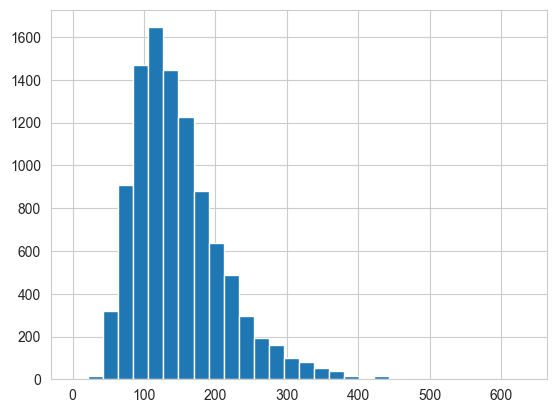

In [45]:
dia_1=simulation_amazon.iloc[1,:]
dia_1
plt.hist(dia_1, bins=30)
plt.show()




In [27]:
result_amazon

NameError: name 'result_amazon' is not defined

## Simulación Coca Cola

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


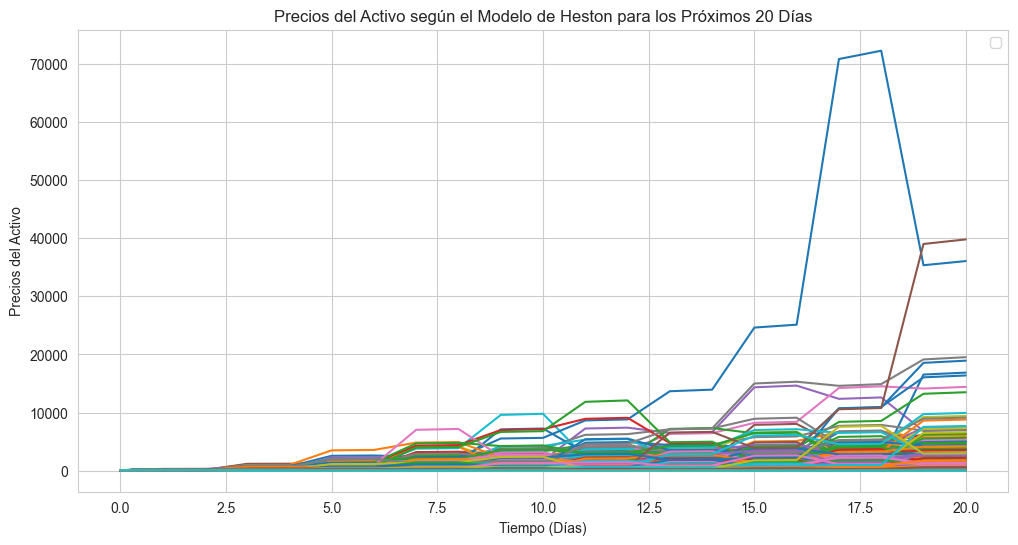

          Mean     Std Dev
0    86.991301    0.869957
1    88.198580   31.573121
2    89.293771   34.319602
3    91.749425   83.126175
4    93.097690   84.883027
5    93.097890  133.904681
6    94.576542  137.011915
7    99.098190  218.298869
8   100.592441  222.507537
9    99.212379  274.474963
10  100.794621  280.052261
11  101.109689  335.764152
12  102.783022  342.736063
13  101.842816  356.780805
14  103.314269  363.630993
15  105.788921  483.210874
16  107.657834  492.959287
17  113.525347  855.560013
18  115.583342  872.859485
19  116.186781  786.278404
20  118.314069  802.268944


In [88]:
S0 = S_0_apple  # precio del activo
T_dias = 20     # tiempo total de simulación en días
N = 20          # número de pasos de tiempo en la simulación
M = 10000        # número de simulaciones

v0 = co_param[0]
kappa = co_param[1]
theta = co_param[2]
sigma = co_param[3]
rho = co_param[4]
r = 0.02

# Calcular el incremento de tiempo
dt = T_dias / N

# Ejecutar la simulación del modelo de Heston para los próximos 20 días
S_p, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T_dias, N, M)

# Crear un DataFrame para almacenar los resultados de la simulación
time_values = np.linspace(0, T_dias, N+1)
columns = [f'Scenario_{i+1}' for i in range(M)]

simulation_co = pd.DataFrame(np.column_stack([time_values, S_p[:, :]]), columns=['Tiempo'] + columns)

# Guardar el DataFrame en un archivo CSV si es necesario

# Graficar la distribución de los precios
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(M):
    ax.plot(simulation_co['Tiempo'], simulation_co[f'Scenario_{i+1}'])

ax.set_title(f'Precios del Coca Cola  para los Próximos {T_dias} Días')
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precios del Activo')
ax.legend()
plt.show()



mean_values = simulation_co.mean(axis=1)
std_dev_values = simulation_co.std(axis=1)

# Create a new DataFrame with mean and standard deviation
result_co = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

# Display the results
print(result_co)


## Simulación Tesla

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


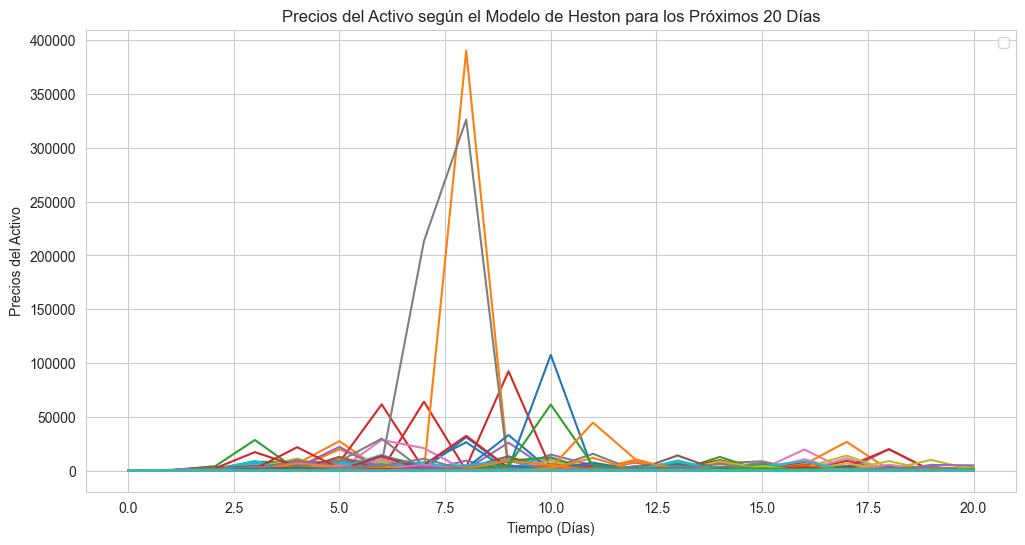

          Mean      Std Dev
0   235.976402     2.359882
1   239.407759    78.051225
2   242.100990   170.690139
3   242.429057   439.191125
4   230.903610   460.613829
5   218.665533   588.211831
6   207.044196   876.732256
7   199.435056  2254.947554
8   231.903110  5115.155761
9   159.194281  1069.848765
10  150.854415  1290.535419
11  124.688331   534.587655
12  110.184282   264.514712
13  103.205479   270.481788
14   96.019198   273.956855
15   87.136186   220.491307
16   82.744026   307.477763
17   77.346965   372.120357
18   70.577342   328.759469
19   61.265473   174.715557
20   53.434557   111.237381


In [89]:
S0 = S_0_tesla  # precio del activo
T_dias = 20     # tiempo total de simulación en días
N = 20          # número de pasos de tiempo en la simulación
M = 10000        # número de simulaciones

v0 = tesla_param[0]
kappa = tesla_param[1]
theta = tesla_param[2]
sigma = tesla_param[3]
rho = tesla_param[4]
r = 0.02

# Calcular el incremento de tiempo
dt = T_dias / N

# Ejecutar la simulación del modelo de Heston para los próximos 20 días
S_p, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T_dias, N, M)

# Crear un DataFrame para almacenar los resultados de la simulación
time_values = np.linspace(0, T_dias, N+1)
columns = [f'Scenario_{i+1}' for i in range(M)]

simulation_tesla = pd.DataFrame(np.column_stack([time_values, S_p[:, :]]), columns=['Tiempo'] + columns)

# Guardar el DataFrame en un archivo CSV si es necesario

# Graficar la distribución de los precios
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(M):
    ax.plot(simulation_tesla['Tiempo'], simulation_tesla[f'Scenario_{i+1}'])

ax.set_title(f'Precios del Activo Tesla {T_dias} Días')
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precios del Activo')
ax.legend()
plt.show()



mean_values = simulation_tesla.mean(axis=1)
std_dev_values = simulation_tesla.std(axis=1)

# Create a new DataFrame with mean and standard deviation
result_tesla = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

# Display the results
print(result_tesla)